## **1. 📦 Core Indicator Themes & Timing**

| Theme               | Indicator                                      | Timing     |
|---------------------|---------------------------------------------------------------------|------------|
| **Confidence**       | Consumer Confidence                            | Leading    |
|                     | Business Confidence                            | Leading    |
| **Labor Market**     | Total Jobs                                     | Coincident |
|                     | Unemployment Rate                              | Lagging    |
|                     | Labor Force Participation                      | Coincident |
| **Inflation**        | Consumer Price Index (CPI)                     | Lagging    |
|                     | Producer Price Index (PPI)                     | Leading    |
|                     | Crude Oil Prices                                | Leading    |
| **Interest Rates**   | Fed Funds Rate                                 | Lagging    |
|                     | Baa-Aaa Treasury Constant Maturity Rate        | Mixed      |
| **Real Economy**     | Housing Starts                                 | Leading    |
|                     | Durable Goods Orders                           | Leading    |
|                     | Capacity Utilization                           | Coincident |
| **Production**       | Industrial Production                          | Coincident |
| **Fiscal & Credit**  | Deficit as % of GDP                            | Lagging    |
|                     | Baa-Aaa Corporate Bond Yield                   | Lagging    |
|                     | Credit Conditions Subindex                      | Lagging    |
| **Liquidity**        | Real M2 Stocks                                 | Lagging    |
| **Sales/Inventory**  | Business Inventories                           | Lagging    |
|                     | Retail Sales                                   | Coincident |
| **Volatility**       | VIX (Volatility Index)                         | Leading    |

### All our Datasets

In [175]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
BCI_df = pd.read_csv('Leading/Business_Confidence_Index.csv')
CCI_df = pd.read_csv('Leading/Consumer_Confidence_Index.csv')
Credit_Conditions_df = pd.read_csv('Leading/Credit_Conditions.csv')
Oil_Prices_df = pd.read_csv('Leading/Crude_Oil_Prices.csv')
Housing_Starts_df = pd.read_csv('Leading/Housing_Starts.csv')
Jobless_Claims_df = pd.read_csv('Leading/Initial_Claims.csv')
Volatility_Index_df = pd.read_csv('Leading/Volatility_Index.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

BCI_df.to_sql('BusinessConfidence', conn, index=False, if_exists='replace')
CCI_df.to_sql('ConsumerConfidence', conn, index=False, if_exists='replace')
Credit_Conditions_df.to_sql('CreditConditions', conn, index=False, if_exists='replace')
Oil_Prices_df.to_sql('OilPrices', conn, index=False, if_exists='replace')
Housing_Starts_df.to_sql('HousingStarts', conn, index=False, if_exists='replace')
Jobless_Claims_df.to_sql('JoblessClaims', conn, index=False, if_exists='replace')
Volatility_Index_df.to_sql('Volatility', conn, index=False, if_exists='replace')



# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM JoblessClaims
LEFT JOIN BusinessConfidence ON JoblessClaims.observation_date = BusinessConfidence.observation_date
LEFT JOIN ConsumerConfidence ON JoblessClaims.observation_date = ConsumerConfidence.observation_date
LEFT JOIN CreditConditions ON JoblessClaims.observation_date = CreditConditions.observation_date
LEFT JOIN OilPrices ON JoblessClaims.observation_date = OilPrices.observation_date
LEFT JOIN HousingStarts ON JoblessClaims.observation_date = HousingStarts.observation_date
LEFT JOIN Volatility ON JoblessClaims.observation_date = Volatility.observation_date

WHERE JoblessClaims.observation_date >= '1970-01-01'
"""

# Execute the query and load results into a DataFrame
Leading_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Leading/Leading_Indicators_df.csv"
Leading_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Output the final DataFrame
Leading_Indicators_df

,observation_date,Jobless_Claims,observation_date,Business_Confidence_Index,observation_date,Consumer_Confidence_Index,observation_date,Credit_Conditions_Subindex,observation_date,Crude_Oil_Prices,observation_date,Housing_Starts,observation_date,Volatility_Index
0,1970-01-01,257077,1970-01-01,-2.6,1970-01-01,78.639130,None,NaN,1970-01-01,3.35,1970-01-01,1085,None,NaN
1,1970-04-01,310692,1970-04-01,-10.0,1970-04-01,76.310112,None,NaN,1970-04-01,3.35,1970-04-01,1264,None,NaN
2,1970-07-01,295923,1970-07-01,-1.0,1970-07-01,76.858696,None,NaN,1970-07-01,3.31,1970-07-01,1517,None,NaN
3,1970-10-01,322538,1970-10-01,-15.2,1970-10-01,74.152174,None,NaN,1970-10-01,3.31,1970-10-01,1580,None,NaN
4,1971-01-01,292692,1971-01-01,-4.2,1971-01-01,76.179348,1971-01-01,-1.15617,1971-01-01,3.56,1971-01-01,1828,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2024-01-01,212154,2024-01-01,-1.8,2024-01-01,79.000000,2024-01-01,-0.01606,2024-01-01,74.15,2024-01-01,1376,2024-01-01,13.71
217,2024-04-01,223615,2024-04-01,-2.4,2024-04-01,77.200000,2024-04-01,-0.04506,2024-04-01,85.35,2024-04-01,1377,2024-04-01,13.98
218,2024-07-01,230769,2024-07-01,-6.0,2024-07-01,66.400000,2024-07-01,-0.03644,2024-07-01,81.80,2024-07-01,1262,2024-07-01,17.07
219,2024-10-01,225462,2024-10-01,-6.2,2024-10-01,70.500000,2024-10-01,-0.08510,2024-10-01,71.99,2024-10-01,1344,2024-10-01,17.36


In [176]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Treasury_Maturity_df = pd.read_csv('Lagging/10Y_2Y_Treasury_Constant_Maturity.csv')
Corporate_Bonds_df = pd.read_csv('Lagging/Baa_Aaa_Corporate_Bond_Yield.csv')
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
Deficit_GDP_df = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Durable_Goods_df = pd.read_csv('Lagging/Durable_Goods.csv')
Interest_Rates_df = pd.read_csv('Lagging/Interest_Rates.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')
Real_GDP_df = pd.read_csv('Lagging/Real_Gross_Domestic_Product.csv')
Real_M2_Stocks_df = pd.read_csv('Lagging/Real_M2_Stocks.csv')
Business_Inventories_df = pd.read_csv('Lagging/Total_Business_Inventories.csv')
Unemployment_Rate_df = pd.read_csv('Lagging/Unemployment_Rate.csv')


# Set up in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Load data into SQL tables
Treasury_Maturity_df.to_sql('TreasuryMaturity', conn, index=False, if_exists='replace')
Corporate_Bonds_df.to_sql('CorporateYield', conn, index=False, if_exists='replace')
CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
Deficit_GDP_df.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Durable_Goods_df.to_sql('DurableGoods', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')
Real_GDP_df.to_sql('GDP', conn, index=False, if_exists='replace')
Real_M2_Stocks_df.to_sql('M2_Stocks', conn, index=False, if_exists='replace')
Business_Inventories_df.to_sql('Inventories', conn, index=False, if_exists='replace')
Unemployment_Rate_df.to_sql('Unemployment', conn, index=False, if_exists='replace')



# SQL query to join all lagging indicator tables on observation_date
sql_query = """
SELECT *
FROM InterestRates
LEFT JOIN TreasuryMaturity ON InterestRates.observation_date = TreasuryMaturity.observation_date
LEFT JOIN CorporateYield ON InterestRates.observation_date = CorporateYield.observation_date
LEFT JOIN CPI ON InterestRates.observation_date = CPI.observation_date
LEFT JOIN DeficitGDP ON InterestRates.observation_date = DeficitGDP.observation_date
LEFT JOIN DurableGoods ON InterestRates.observation_date = DurableGoods.observation_date
LEFT JOIN GDP ON InterestRates.observation_date = GDP.observation_date
LEFT JOIN PPI ON InterestRates.observation_date = PPI.observation_date
LEFT JOIN M2_Stocks ON InterestRates.observation_date = M2_Stocks.observation_date
LEFT JOIN Inventories ON InterestRates.observation_date = Inventories.observation_date
LEFT JOIN Unemployment ON InterestRates.observation_date = Unemployment.observation_date

WHERE InterestRates.observation_date >= '1967-01-01'
"""

# Execute query and load result into DataFrame
Lagging_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save to CSV
Lagging_Indicators_df.to_csv("Lagging/Lagging_Indicators_df.csv", index=False)

# Close the database connection
conn.close()

# Display the final joined DataFrame
Lagging_Indicators_df

,observation_date,Interest_Rates,observation_date,10Y_minus_2Y_Treasury_Constant_Maturity,observation_date,Corporate_Bond_Yield,observation_date,CPI,observation_date,Deficit_%_GDP,...,observation_date,GDP,observation_date,PPI,observation_date,M2_Money_Stocks,observation_date,Business_Inventories,observation_date,Unemployment_Rate
0,1967-01-01,4.82,None,NaN,None,None,1967-01-01,1.020,None,NaN,...,1967-01-01,4870.299,1967-01-01,1.51976,1967-01-01,1463.8,None,NaN,1967-01-01,3.9
1,1967-04-01,3.99,None,NaN,None,None,1967-04-01,0.820,None,NaN,...,1967-04-01,4873.287,1967-04-01,-0.30120,1967-04-01,1486.7,None,NaN,1967-04-01,3.8
2,1967-07-01,3.89,None,NaN,None,None,1967-07-01,0.950,None,NaN,...,1967-07-01,4919.392,1967-07-01,0.00000,1967-07-01,1515.9,None,NaN,1967-07-01,3.8
3,1967-10-01,4.17,None,NaN,None,None,1967-10-01,0.850,None,NaN,...,1967-10-01,4956.477,1967-10-01,0.00000,1967-10-01,1537.7,None,NaN,1967-10-01,4.0
4,1968-01-01,4.79,None,NaN,None,None,1968-01-01,1.200,None,NaN,...,1968-01-01,5057.553,1968-01-01,1.19760,1968-01-01,1546.6,None,NaN,1968-01-01,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2024-01-01,5.33,2024-01-01,-0.26,None,None,2024-01-01,9.338,2024-01-01,-6.28002,...,2024-01-01,23053.545,2024-01-01,-3.42816,2024-01-01,6705.5,2024-01-01,2533439.0,2024-01-01,3.7
229,2024-04-01,5.33,2024-04-01,-0.33,None,None,2024-04-01,10.158,None,NaN,...,2024-04-01,23223.906,2024-04-01,0.02725,2024-04-01,6687.5,2024-04-01,2546223.0,2024-04-01,3.9
230,2024-07-01,5.26,2024-07-01,-0.25,None,None,2024-07-01,8.951,None,NaN,...,2024-07-01,23400.294,2024-07-01,1.37333,2024-07-01,6728.5,2024-07-01,2574892.0,2024-07-01,4.2
231,2024-10-01,4.65,2024-10-01,0.12,None,None,2024-10-01,7.911,None,NaN,...,2024-10-01,23542.349,2024-10-01,-0.82722,2024-10-01,6761.1,2024-10-01,2585582.0,2024-10-01,4.1


In [177]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Industrial_Production_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Labor_Force_Participation_df = pd.read_csv('Coincident/Labor_Force_Participation.csv')
Retail_Sales_df = pd.read_csv('Coincident/Retail_Sales.csv')
Total_Jobs_df = pd.read_csv('Coincident/Total_Jobs.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')
Industrial_Production_df.to_sql('IndProd', conn, index=False, if_exists='replace')
Labor_Force_Participation_df.to_sql('LaborForce', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('RetailSales', conn, index=False, if_exists='replace')
Total_Jobs_df.to_sql('Jobs', conn, index=False, if_exists='replace')


# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Capacity
LEFT JOIN IndProd ON Capacity.observation_date = IndProd.observation_date
LEFT JOIN LaborForce ON Capacity.observation_date = LaborForce.observation_date
LEFT JOIN RetailSales ON Capacity.observation_date = RetailSales.observation_date
LEFT JOIN Jobs ON Capacity.observation_date = Jobs.observation_date 
WHERE Capacity.observation_date >= '1967-01-01'
"""

# Execute the query and load results into a DataFrame
Coincident_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Coincident/Coincident_Indicators_df.csv"
Coincident_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Coincident_Indicators_df

,observation_date,Capacity_Utilization_Rate,observation_date,Industrial_Production_Index,observation_date,Labor_Force_Participation,observation_date,Total_Retail_Sales,observation_date,Total_Jobs
0,1967-01-01,88.1496,1967-01-01,35.1638,1967-01-01,59.5,None,NaN,1967-01-01,65407
1,1967-04-01,86.6086,1967-04-01,34.8951,1967-04-01,59.4,None,NaN,1967-04-01,65466
2,1967-07-01,86.0431,1967-07-01,34.5076,1967-07-01,59.6,None,NaN,1967-07-01,65888
3,1967-10-01,87.1866,1967-10-01,35.3976,1967-10-01,59.9,None,NaN,1967-10-01,66225
4,1968-01-01,87.3375,1968-01-01,36.2514,1968-01-01,59.2,None,NaN,1968-01-01,66804
...,...,...,...,...,...,...,...,...,...,...
227,2023-10-01,78.2766,2023-10-01,102.5781,2023-10-01,62.7,2023-10-01,227323.0,2023-10-01,156520
228,2024-01-01,77.7036,2024-01-01,101.4830,2024-01-01,62.5,2024-01-01,224062.0,2024-01-01,157049
229,2024-04-01,77.9731,2024-04-01,102.3568,2024-04-01,62.7,2024-04-01,224487.0,2024-04-01,157635
230,2024-07-01,77.6310,2024-07-01,102.5192,2024-07-01,62.7,2024-07-01,226699.0,2024-07-01,158003


In [178]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Industrial_Production_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Labor_Force_Participation_df = pd.read_csv('Coincident/Labor_Force_Participation.csv')

Total_Jobs_df = pd.read_csv('Coincident/Total_Jobs.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')
Industrial_Production_df.to_sql('IndProd', conn, index=False, if_exists='replace')
Labor_Force_Participation_df.to_sql('LaborForce', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('RetailSales', conn, index=False, if_exists='replace')
Total_Jobs_df.to_sql('Jobs', conn, index=False, if_exists='replace')


# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Capacity
LEFT JOIN IndProd ON Capacity.observation_date = IndProd.observation_date
LEFT JOIN LaborForce ON Capacity.observation_date = LaborForce.observation_date
LEFT JOIN RetailSales ON Capacity.observation_date = RetailSales.observation_date
LEFT JOIN Jobs ON Capacity.observation_date = Jobs.observation_date 
WHERE Capacity.observation_date >= '1967-01-01'
"""

# Execute the query and load results into a DataFrame
Coincident_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Coincident/Coincident_Indicators_df.csv"
Coincident_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Coincident_Indicators_df

,observation_date,Capacity_Utilization_Rate,observation_date,Industrial_Production_Index,observation_date,Labor_Force_Participation,observation_date,Total_Retail_Sales,observation_date,Total_Jobs
0,1967-01-01,88.1496,1967-01-01,35.1638,1967-01-01,59.5,None,NaN,1967-01-01,65407
1,1967-04-01,86.6086,1967-04-01,34.8951,1967-04-01,59.4,None,NaN,1967-04-01,65466
2,1967-07-01,86.0431,1967-07-01,34.5076,1967-07-01,59.6,None,NaN,1967-07-01,65888
3,1967-10-01,87.1866,1967-10-01,35.3976,1967-10-01,59.9,None,NaN,1967-10-01,66225
4,1968-01-01,87.3375,1968-01-01,36.2514,1968-01-01,59.2,None,NaN,1968-01-01,66804
...,...,...,...,...,...,...,...,...,...,...
227,2023-10-01,78.2766,2023-10-01,102.5781,2023-10-01,62.7,2023-10-01,227323.0,2023-10-01,156520
228,2024-01-01,77.7036,2024-01-01,101.4830,2024-01-01,62.5,2024-01-01,224062.0,2024-01-01,157049
229,2024-04-01,77.9731,2024-04-01,102.3568,2024-04-01,62.7,2024-04-01,224487.0,2024-04-01,157635
230,2024-07-01,77.6310,2024-07-01,102.5192,2024-07-01,62.7,2024-07-01,226699.0,2024-07-01,158003


In [179]:
import pandas as pd
import sqlite3



Total_Jobs_Added_df= pd.read_csv('Coincident/Total_Jobs.csv')
Total_Jobs_Added_df['Jobs_Added'] = Total_Jobs_Added_df['Total_Jobs'].diff()
Total_Jobs_Added_df

Unemployment_Rate_Change_df = pd.read_csv('Lagging/Unemployment_Rate.csv')
Unemployment_Rate_Change_df['Unemployment_Rate_Change'] = Unemployment_Rate_Change_df['Unemployment_Rate'].diff()
Unemployment_Rate_Change_df

Real_GDP_Growth_Rate_df = pd.read_csv('Lagging/Real_Gross_Domestic_Product.csv')
Real_GDP_Growth_Rate_df['GDP_Growth_Rate'] = Real_GDP_Growth_Rate_df['GDP'].pct_change()*100
Real_GDP_Growth_Rate_df

Industrial_Production_Growth_Rate_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Industrial_Production_Growth_Rate_df['Industrial_Production_Growth'] = Industrial_Production_Growth_Rate_df['Industrial_Production_Index'].pct_change()*100
Industrial_Production_Growth_Rate_df

Treasury_Maturity_df = pd.read_csv('Lagging/10Y_2Y_Treasury_Constant_Maturity.csv')
Treasury_Maturity_df['Constant_Maturity_Growth'] = Treasury_Maturity_df['10Y_minus_2Y_Treasury_Constant_Maturity'].diff()

CCI_df = pd.read_csv('Leading/Consumer_Confidence_Index.csv')
CCI_df['CCI_growth_rate'] = CCI_df['Consumer_Confidence_Index'].pct_change()*100

BCI_df = pd.read_csv('Leading/Business_Confidence_Index.csv')
BCI_df['BCI_growth_rate'] = BCI_df['Business_Confidence_Index'].pct_change()*100

Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Capacity_df['Capacity_Growth_Rate'] = Capacity_df['Capacity_Utilization_Rate'].pct_change()*100



NBER_df = pd.read_csv('Extra_Files/USREC.csv')

# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------

conn = sqlite3.connect(':memory:')

Total_Jobs_Added_df.to_sql('Jobs', conn, index=False, if_exists='replace')
Unemployment_Rate_Change_df.to_sql('Unemployment', conn, index=False, if_exists='replace')
Real_GDP_Growth_Rate_df.to_sql('GDP', conn, index=False, if_exists='replace')
Industrial_Production_Growth_Rate_df.to_sql('IndProd', conn, index=False, if_exists='replace')
Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')
BCI_df.to_sql('BCI', conn, index=False, if_exists='replace')



sql_query = """
SELECT GDP.observation_date, GDP_Growth_Rate, Unemployment_Rate_Change, Jobs_Added, Industrial_Production_Growth, Capacity_Growth_Rate, BCI_growth_rate
FROM GDP
LEFT JOIN Unemployment ON GDP.observation_date = Unemployment.observation_date
LEFT JOIN Jobs ON GDP.observation_date = Jobs.observation_date
LEFT JOIN IndProd ON GDP.observation_date = IndProd.observation_date
LEFT JOIN Capacity ON GDP.observation_date = Capacity.observation_date
LEFT JOIN BCI ON GDP.observation_date = BCI.observation_date
WHERE GDP.observation_date >= '1976-10-01'
"""

# Execute the query and load results into a DataFrame
Prediction_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Prediction_Indicators.csv"
Prediction_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Prediction_Indicators_df

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Capacity_Growth_Rate,BCI_growth_rate
0,1976-10-01,0.722604,0.1,19.0,-0.024904,1.103907,-2.777778
1,1977-01-01,1.186233,-0.3,242.0,-0.689685,1.251134,-27.272727
2,1977-04-01,1.941924,-0.2,337.0,0.976329,2.311717,-17.857143
3,1977-07-01,1.803165,-0.3,346.0,0.135890,0.244414,13.235294
4,1977-10-01,0.001993,0.0,268.0,0.153911,-0.234536,38.461538
...,...,...,...,...,...,...,...
188,2023-10-01,0.788673,0.1,186.0,-0.706624,-0.828450,121.428571
189,2024-01-01,0.404802,-0.1,119.0,-1.118474,-0.732020,-68.965517
190,2024-04-01,0.738980,0.0,118.0,-0.157825,0.346831,500.000000
191,2024-07-01,0.759510,0.1,88.0,-0.711066,-0.438741,76.470588


## 3. Regime Definition & Labeling


### 📊 Columns in Your Dataset:

From your dataset, we'll base the classification on:

- `GDP_Growth_Rate`
- `Unemployment_Rate_Change`
- `Jobs_Added`
- `Industrial_Production_Growth`
- `Capacity_Utilization_Growth_Rate`

---

---

In [180]:
def classify_regime(row):
    gdp = row['GDP_Growth_Rate']
    unemp = row['Unemployment_Rate_Change']
    jobs = row['Jobs_Added']
    prod = row['Industrial_Production_Growth']
    capacity = row['Capacity_Growth_Rate']
    bci = row['BCI_growth_rate']

    # Recession scoring
    recession_score = 0
    recession_score += 3 if gdp < 0.6 else 0
    recession_score += 2 if unemp > 0.3 else 0
    recession_score += 3 if jobs < -100_000 else 2 if jobs < -50_000 else 0
    recession_score += 2 if prod < -0.3 else 1 if prod < -0.15 else 0

    # Boom scoring
    boom_score = 0
    boom_score += 2 if gdp > 1.8 else 0
    boom_score += 2 if unemp < 0.05 else 0
    boom_score += 2 if jobs > 100_000 else 0
    boom_score += 1 if prod > 1.5 else 0

    # Recession decision
    if (
        recession_score >= 6 or
        (recession_score == 5 and jobs < 0 and prod < 0)
    ):
        return "(Likely)Recession"

    # Boom decision
    if boom_score >= 5:
        return "Boom"

    # Stable decision
    stable_score = sum([
        0.7 < gdp <= 3.0,
        -0.1 <= unemp <= 0.2,
        30_000 < jobs <= 200_000,
        0.1 <= prod <= 2.2
    ])
    if stable_score >= 2 and not (prod < -0.4 and gdp < 0.8):
        return "Stable"

    # Weakening (mild slowdown zone)
    if (
        gdp < 1.0 or prod < 0.1 or bci < -1.5 or capacity < -0.6
    ):
        return "Weakening"

    return "Stable"



# Apply early warning classifier
Prediction_Indicators_df["Regime_Label"] = Prediction_Indicators_df.apply(classify_regime, axis=1)

# Return updated counts including "Recession Watch"
Prediction_Indicators_df["Regime_Label"].value_counts()
Prediction_Indicators_df

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Capacity_Growth_Rate,BCI_growth_rate,Regime_Label
0,1976-10-01,0.722604,0.1,19.0,-0.024904,1.103907,-2.777778,Stable
1,1977-01-01,1.186233,-0.3,242.0,-0.689685,1.251134,-27.272727,Weakening
2,1977-04-01,1.941924,-0.2,337.0,0.976329,2.311717,-17.857143,Stable
3,1977-07-01,1.803165,-0.3,346.0,0.135890,0.244414,13.235294,Stable
4,1977-10-01,0.001993,0.0,268.0,0.153911,-0.234536,38.461538,Stable
...,...,...,...,...,...,...,...,...
188,2023-10-01,0.788673,0.1,186.0,-0.706624,-0.828450,121.428571,Weakening
189,2024-01-01,0.404802,-0.1,119.0,-1.118474,-0.732020,-68.965517,Weakening
190,2024-04-01,0.738980,0.0,118.0,-0.157825,0.346831,500.000000,Stable
191,2024-07-01,0.759510,0.1,88.0,-0.711066,-0.438741,76.470588,Weakening


### Graph comparing the Model's recession projections to NBER's recessions projection per period

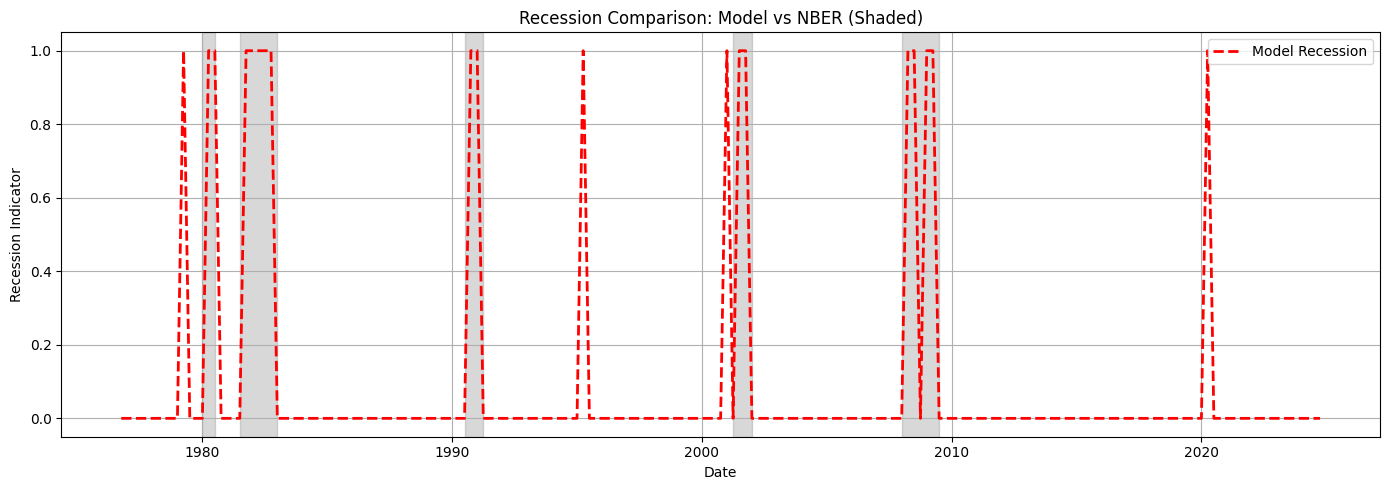

In [181]:
# Apply the user's classifier to the loaded Prediction_Indicators_df
df = pd.read_csv("Extra_Files/Prediction_Indicators.csv")
nber = pd.read_csv("Extra_Files/USREC.csv")
df = df.merge(nber, on="observation_date", how="left")
df["NBER_Projection"] = df["NBER_Projection"].fillna(0).astype(int)

# Apply the custom regime classifier
def classify_regime(row):
    gdp = row['GDP_Growth_Rate']
    unemp = row['Unemployment_Rate_Change']
    jobs = row['Jobs_Added']
    prod = row['Industrial_Production_Growth']
    capacity = row['Capacity_Growth_Rate']
    bci = row['BCI_growth_rate']

    # Recession scoring
    recession_score = 0
    recession_score += 3 if gdp < 0.6 else 0
    recession_score += 2 if unemp > 0.3 else 0
    recession_score += 3 if jobs < -100_000 else 2 if jobs < -50_000 else 0
    recession_score += 2 if prod < -0.3 else 1 if prod < -0.15 else 0

    # Boom scoring
    boom_score = 0
    boom_score += 2 if gdp > 1.8 else 0
    boom_score += 2 if unemp < 0.05 else 0
    boom_score += 2 if jobs > 100_000 else 0
    boom_score += 1 if prod > 1.5 else 0

    # Recession decision
    if (
        recession_score >= 6 or
        (recession_score == 5 and jobs < 0 and prod < 0)
    ):
        return "(Likely)Recession"

    # Boom decision
    if boom_score >= 5:
        return "Boom"

    # Stable decision
    stable_score = sum([
        0.7 < gdp <= 3.0,
        -0.1 <= unemp <= 0.2,
        30_000 < jobs <= 200_000,
        0.1 <= prod <= 2.2
    ])
    if stable_score >= 2 and not (prod < -0.4 and gdp < 0.8):
        return "Stable"

    # Weakening (mild slowdown zone)
    if (
        gdp < 1.0 or prod < 0.1 or bci < -1.5 or capacity < -0.6
    ):
        return "Weakening"

    return "Stable"

# Apply regime labeling
df["Regime_Label"] = df.apply(classify_regime, axis=1)

# Prepare for plot
df["observation_date"] = pd.to_datetime(df["observation_date"])
df = df.sort_values("observation_date")

df["NBER_Recession"] = df["NBER_Projection"]
df["Model_Recession"] = (df["Regime_Label"] == "(Likely)Recession").astype(int)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df["observation_date"], df["Model_Recession"], label="Model Recession", color="red", linestyle='--', linewidth=2)

# Shade NBER periods
in_recession = False
for i in range(len(df)):
    if df.iloc[i]["NBER_Recession"] == 1 and not in_recession:
        start_date = df.iloc[i]["observation_date"]
        in_recession = True
    elif df.iloc[i]["NBER_Recession"] == 0 and in_recession:
        end_date = df.iloc[i]["observation_date"]
        plt.axvspan(start_date, end_date, color='gray', alpha=0.3)
        in_recession = False
if in_recession:
    plt.axvspan(start_date, df.iloc[-1]["observation_date"], color='gray', alpha=0.3)

plt.title("Recession Comparison: Model vs NBER (Shaded)")
plt.xlabel("Date")
plt.ylabel("Recession Indicator")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Historic Pattern Analysis (Retro)
- Build **pre-regime-transition snapshots** (1974-75, 1980, 1981-82, 1991, 2001, 2008, 2020)  
- Identify which indicators **change earliest** before downturns or recoveries  
- Use pattern recognition to validate labeling and feature design
✅ Ensures model is grounded in historical economic transitions.


In [182]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')


# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')



# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '1979-04-01'
AND Prediction_Indicator.observation_date <= '1980-04-01'
"""


# Run the query
Pre_1980_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1980_Recession.csv"
Pre_1980_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1980_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Capacity_Growth_Rate,BCI_growth_rate,Regime_Label
0,1979-04-01,0.106745,0.0,-62.0,-1.180441,-1.027595,-19.480519,(Likely)Recession
1,1979-07-01,0.742805,0.0,109.0,-0.161432,-1.047774,-51.851852,Stable
2,1979-10-01,0.250045,0.1,154.0,0.691558,-0.289246,150.000000,Stable
3,1980-01-01,0.314571,0.3,128.0,0.531456,-0.178715,-26.923077,Weakening
4,1980-04-01,-2.060435,0.6,-145.0,-1.982205,-4.761837,96.875000,(Likely)Recession


In [183]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '1980-07-01'
AND Prediction_Indicator.observation_date <= '1981-07-01'
"""


# Run the query
Pre_1981_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1981_Recession.csv"
Pre_1981_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1981_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Capacity_Growth_Rate,BCI_growth_rate,Regime_Label
0,1980-07-01,-0.118855,0.2,-261.0,-0.711736,-2.170985,-23.857868,(Likely)Recession
1,1980-10-01,1.864923,0.0,277.0,1.270376,3.259788,5400.000000,Stable
2,1981-01-01,1.959422,0.3,90.0,-0.632499,-0.398079,-126.666667,Weakening
3,1981-04-01,-0.741076,-0.2,73.0,-0.420748,-0.363472,-500.000000,Weakening
4,1981-07-01,1.197502,-0.3,111.0,0.650995,0.223473,-571.428571,Stable


In [184]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '1990-07-01'
AND Prediction_Indicator.observation_date <= '1991-07-01'
"""


# Run the query
Pre_1991_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1991_Recession.csv"
Pre_1991_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1991_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Capacity_Growth_Rate,BCI_growth_rate,Regime_Label
0,1990-07-01,0.066582,0.3,-35.0,-0.166380,-0.163199,325.000000,Weakening
1,1990-10-01,-0.910405,0.0,-146.0,-0.614784,-1.967636,23.636364,(Likely)Recession
2,1991-01-01,-0.467941,0.1,-110.0,-0.333341,-2.196586,17.391304,(Likely)Recession
3,1991-04-01,0.779689,-0.1,-218.0,0.257225,0.308803,-22.580645,Stable
4,1991-07-01,0.505359,-0.1,-40.0,0.274080,1.149004,100.000000,Weakening


In [185]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '2000-04-01'
AND Prediction_Indicator.observation_date <= '2001-04-01'
"""

# Run the query
Pre_2001_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_2001_Recession.csv"
Pre_2001_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2001_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Capacity_Growth_Rate,BCI_growth_rate,Regime_Label
0,2000-04-01,1.821288,-0.2,279.0,0.633016,0.205707,-4.081633,Stable
1,2000-07-01,0.101933,0.0,166.0,-0.176878,-1.057415,78.571429,Weakening
2,2000-10-01,0.597039,0.0,14.0,-0.368563,-1.253837,333.333333,Weakening
3,2001-01-01,-0.327799,0.3,-13.0,-0.492606,-2.187213,40.983607,(Likely)Recession
4,2001-04-01,0.624503,0.1,-294.0,-0.351532,-2.159685,-6.756757,Weakening


In [186]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '2007-01-01'
AND Prediction_Indicator.observation_date <= '2008-01-01'
"""



# Run the query
Pre_2008_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_2008_Recession.csv"
Pre_2008_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2008_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Capacity_Growth_Rate,BCI_growth_rate,Regime_Label
0,2007-01-01,0.300836,0.2,223.0,-0.357498,0.304859,-146.666667,Weakening
1,2007-04-01,0.611762,0.1,63.0,0.671092,0.525888,300.000000,Stable
2,2007-07-01,0.576026,0.1,-25.0,-0.156805,-0.289863,-32.352941,Weakening
3,2007-10-01,0.628237,0.0,76.0,-0.292517,0.273605,-20.000000,Weakening
4,2008-01-01,-0.426764,0.0,-4.0,-0.124271,-0.073405,-143.750000,Weakening


In [187]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '2019-04-01'
AND Prediction_Indicator.observation_date <= '2020-04-01'
"""

# Run the query
Pre_2020_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_2020_Recession.csv"
Pre_2020_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2020_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Capacity_Growth_Rate,BCI_growth_rate,Regime_Label
0,2019-04-01,0.835146,-0.1,298.0,-0.545820,-0.863047,-47.169811,Stable
1,2019-07-01,1.170002,0.1,97.0,-0.523490,-0.291626,-29.411765,Stable
2,2019-10-01,0.681878,0.1,95.0,-0.851356,-0.750179,-22.727273,Weakening
3,2020-01-01,-1.392441,0.0,236.0,-0.593376,-1.762749,-132.142857,Weakening
4,2020-04-01,-7.908965,10.4,-20471.0,-13.241809,-12.645449,844.444444,(Likely)Recession


### Determine the Early Movers Before Each Recession

Insights:
- Jobless Claims is a consistent early warning signal (in every recession except 1991).
- Industrial Production and Capacity often dip well before GDP or Jobs fall.
- Unemployment Rate changes are more visible closer to the recession start (2001, 2008).
- 1991 recession may have had a more sudden onset or lag in available data signals.

## Data Preparation
- Convert all indicators to **quarterly format**  
- Apply **z-score normalization**  
- Analyze regime-specific trends over time  
- Run **PCA or TSNE** to explore regime separability  
- Visualize regime boundaries via scatter plots or clusters

In [188]:
from sklearn.preprocessing import StandardScaler

Prediction_Indicators_df['label_regime'] = Prediction_Indicators_df.apply(classify_regime, axis=1)

features = ['GDP_Growth_Rate', 'Unemployment_Rate_Change', 'Jobs_Added', 'Industrial_Production_Growth', 'Capacity_Growth_Rate']

scaler = StandardScaler()

Prediction_Indicators_df[features] = scaler.fit_transform(Prediction_Indicators_df[features])


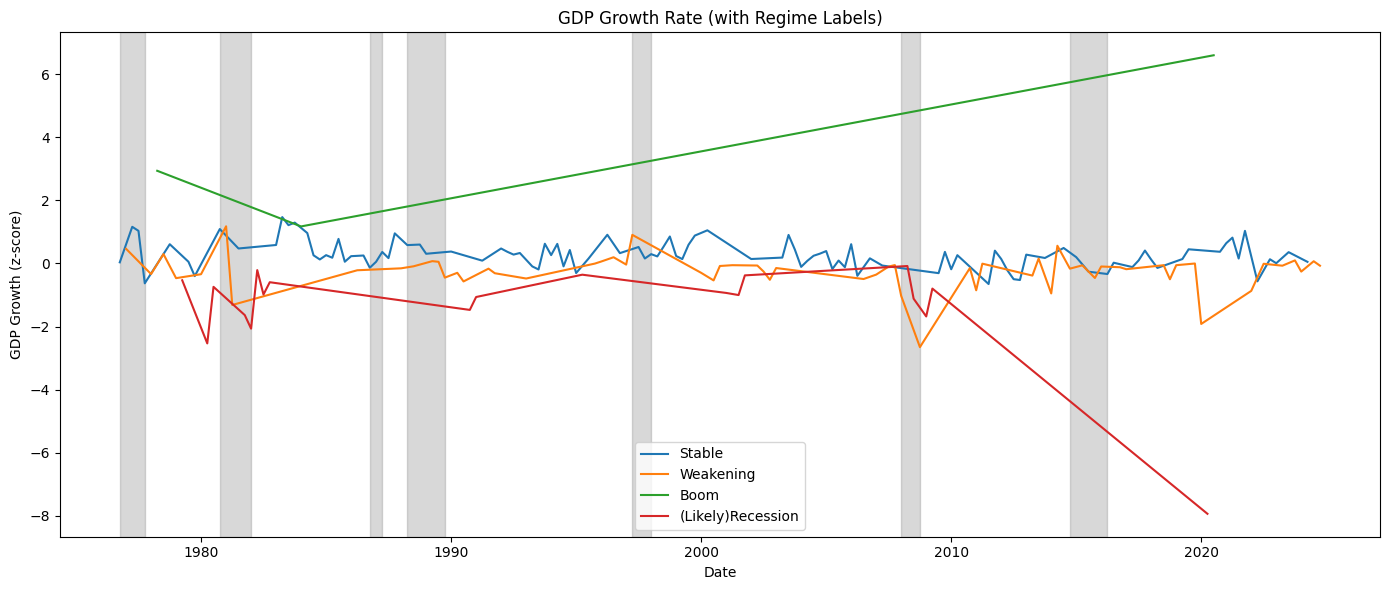

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='GDP_Growth_Rate', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('GDP Growth Rate (with Regime Labels)')
plt.xlabel('Date')
plt.ylabel('GDP Growth (z-score)')
plt.legend()
plt.tight_layout()
plt.show()

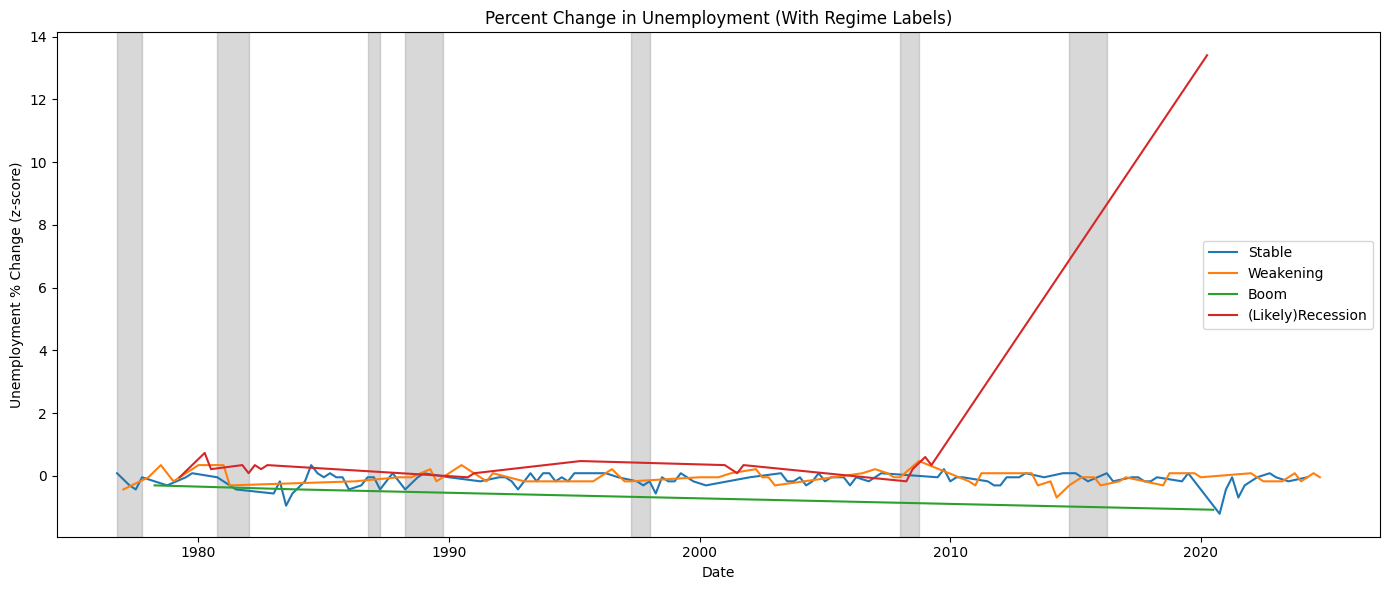

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Unemployment_Rate_Change', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('Percent Change in Unemployment (With Regime Labels)')
plt.xlabel('Date')
plt.ylabel('Unemployment % Change (z-score)')
plt.legend()
plt.tight_layout()
plt.show()


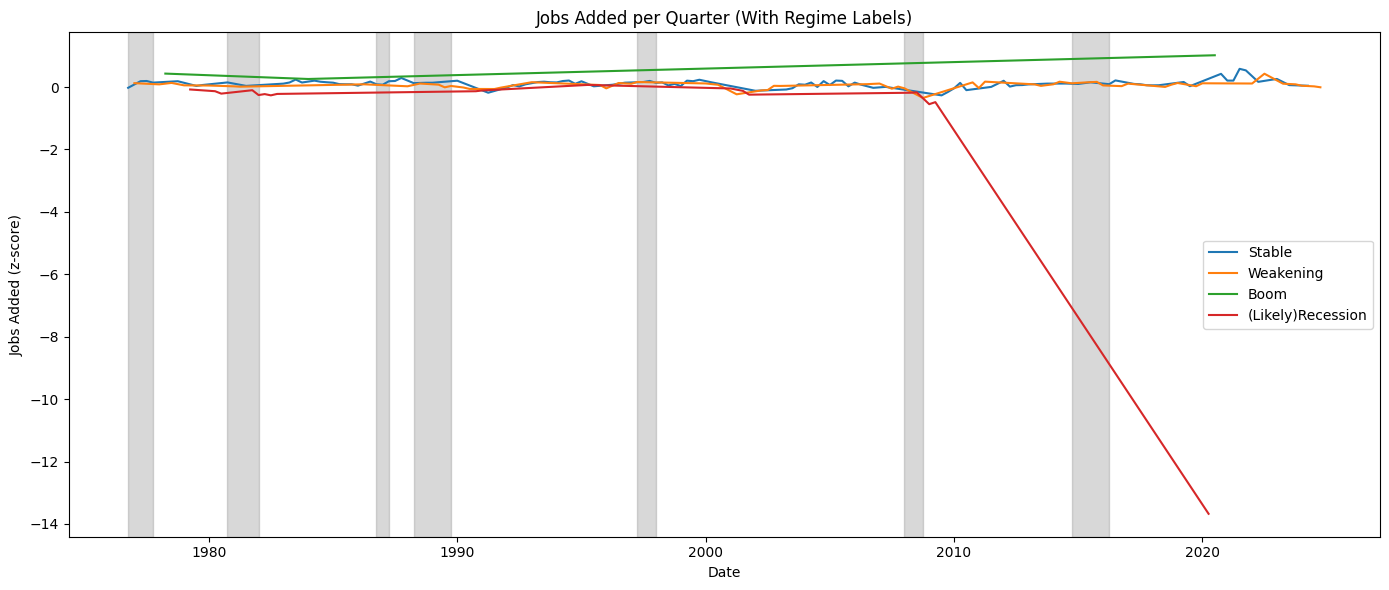

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Jobs_Added', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('Jobs Added per Quarter (With Regime Labels)')
plt.xlabel('Date')
plt.ylabel('Jobs Added (z-score)')
plt.legend()
plt.tight_layout()
plt.show()

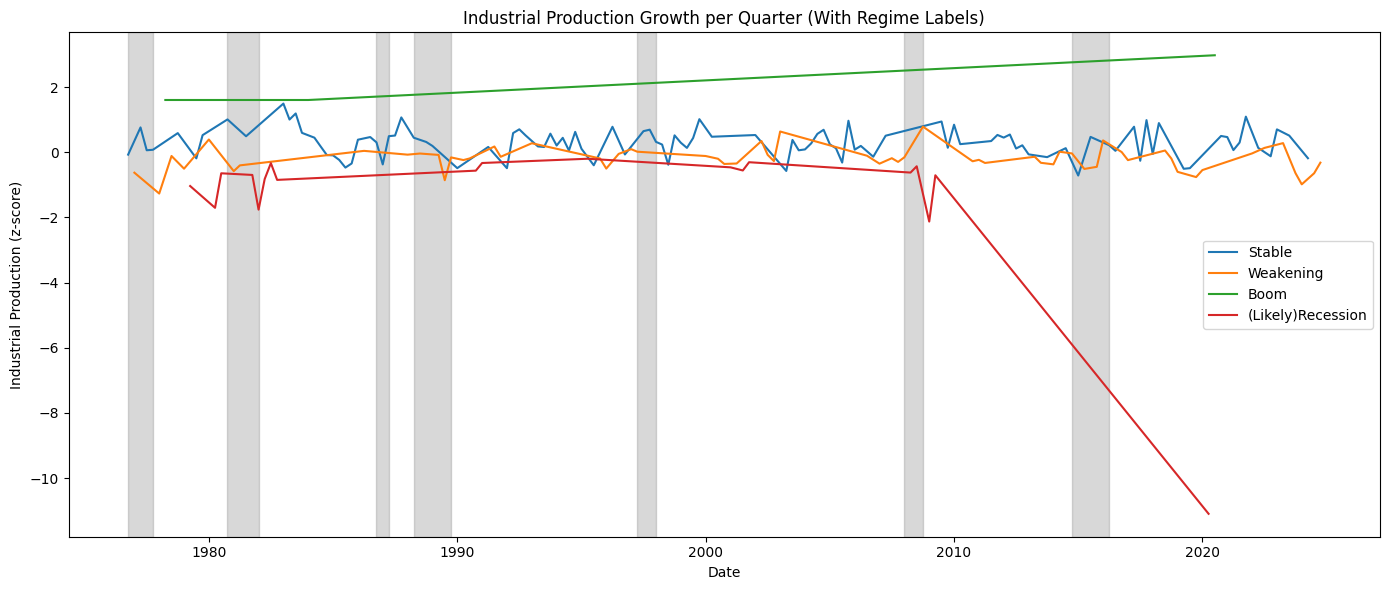

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Industrial_Production_Growth', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('Industrial Production Growth per Quarter (With Regime Labels)')
plt.xlabel('Date')
plt.ylabel('Industrial Production (z-score)')
plt.legend()
plt.tight_layout()
plt.show()

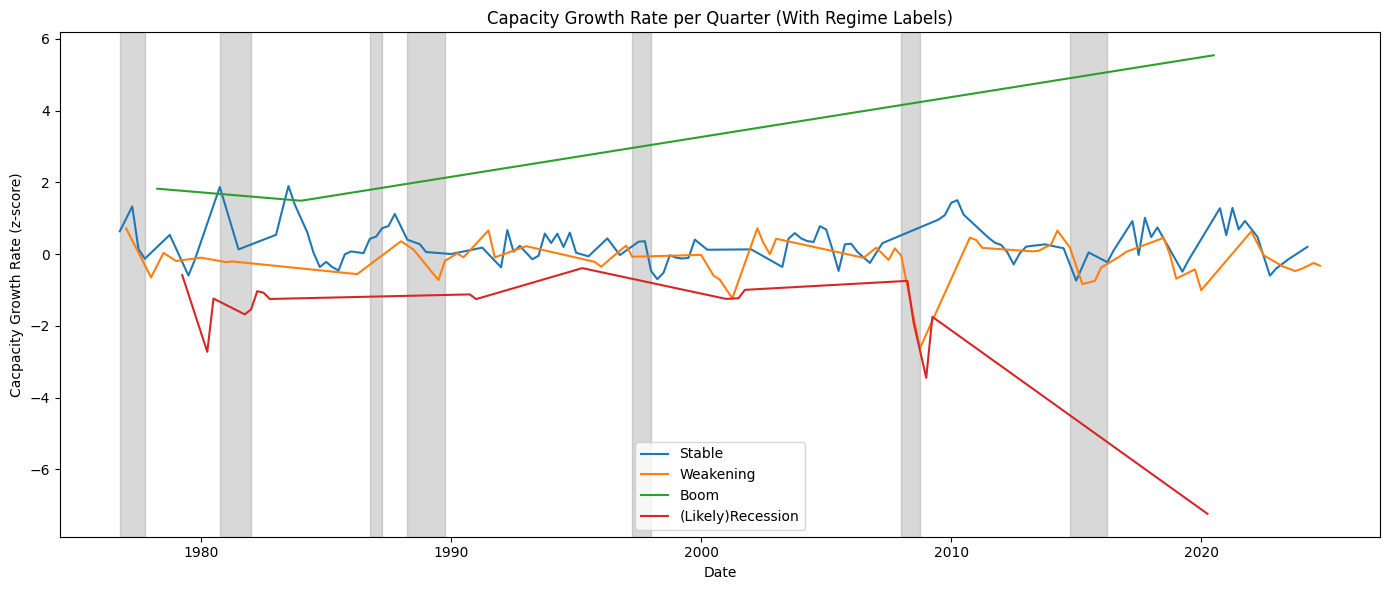

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Capacity_Growth_Rate', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('Capacity Growth Rate per Quarter (With Regime Labels)')
plt.xlabel('Date')
plt.ylabel('Cacpacity Growth Rate (z-score)')
plt.legend()
plt.tight_layout()
plt.show()


| Regime     | Separation in PCA | Implication                            |
|------------|-------------------|----------------------------------------|
| Recession  | High              | Easy for models to learn               |
| Boom       | Moderate–High     | Also distinct                          |
| Stable     | Medium            | Some overlap with Mild                 |
| Mild       | Low               | Hardest to distinguish, needs lags/rolls |

<Axes: xlabel='PC1', ylabel='PC2'>

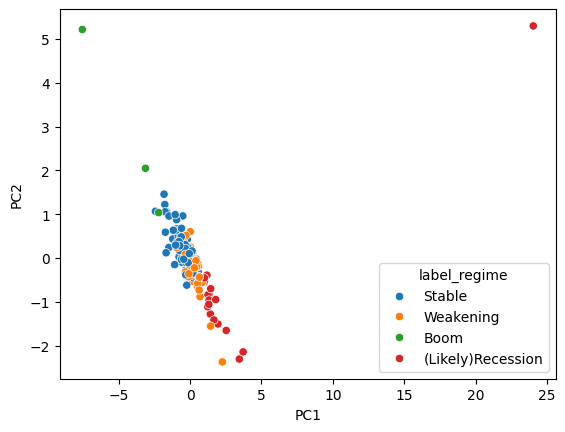

In [194]:
from sklearn.decomposition import PCA

X = Prediction_Indicators_df[features]
pca = PCA(n_components=2)
Prediction_Indicators_df[['PC1', 'PC2']] = pca.fit_transform(X)

sns.scatterplot(data=Prediction_Indicators_df, x='PC1', y='PC2', hue='label_regime')


## STEP 2: **EDA+Feature Engineeing**

In [195]:
import pandas as pd
import sqlite3

def drop_duplicate_columns(df):
    return df.loc[:, ~df.columns.duplicated()]
    
Lagging_Indicators_df = drop_duplicate_columns(Lagging_Indicators_df)
Leading_Indicators_df = drop_duplicate_columns(Leading_Indicators_df)
Coincident_Indicators_df = drop_duplicate_columns(Coincident_Indicators_df)


conn = sqlite3.connect(':memory:')

Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')
Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')


sql_query = """
SELECT *
FROM Lagging
LEFT JOIN Leading ON Lagging.observation_date = Leading.observation_date
LEFT JOIN Coincident ON Lagging.observation_date = Coincident.observation_date
WHERE Lagging.observation_date >= '1976-10-01'
"""

# Execute the query and load results into a DataFrame
All_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Extra_Files/All_Indicators.csv"
All_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
All_Indicators_df

,observation_date,Interest_Rates,10Y_minus_2Y_Treasury_Constant_Maturity,Corporate_Bond_Yield,CPI,Deficit_%_GDP,Durable_Good_Orders,GDP,PPI,M2_Money_Stocks,...,Credit_Conditions_Subindex,Crude_Oil_Prices,Housing_Starts,Volatility_Index,observation_date,Capacity_Utilization_Rate,Industrial_Production_Index,Labor_Force_Participation,Total_Retail_Sales,Total_Jobs
0,1976-10-01,4.87,1.43,None,3.000,-2.917053,NaN,6451.177,3.51171,1943.0,...,-1.56955,13.90,1629,NaN,1976-10-01,80.9266,44.5600,61.6,NaN,79911.0
1,1977-01-01,4.66,1.31,None,2.900,-2.577500,NaN,6527.703,4.84140,1985.0,...,-1.73878,13.90,1527,NaN,1977-01-01,81.9391,45.4156,61.6,NaN,80690.0
2,1977-04-01,5.16,1.41,None,3.900,-2.562325,NaN,6654.466,7.09571,1999.3,...,-1.64696,13.90,1892,NaN,1977-04-01,83.8333,47.1719,62.1,NaN,81728.0
3,1977-07-01,5.82,1.06,None,3.800,-2.547150,NaN,6774.457,5.68182,2017.6,...,-1.30813,13.90,2058,NaN,1977-07-01,84.0382,47.9714,62.1,NaN,82834.0
4,1977-10-01,6.51,0.42,None,3.700,-2.531975,NaN,6774.592,5.97738,2035.7,...,-1.09820,14.85,2042,NaN,1977-10-01,83.8411,48.2839,62.4,NaN,83800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2024-01-01,5.33,-0.26,None,9.338,-6.280020,279500.0,23053.545,-3.42816,6705.5,...,-0.01606,74.15,1376,13.71,2024-01-01,77.7036,101.4830,62.5,224062.0,157049.0
190,2024-04-01,5.33,-0.33,None,10.158,NaN,276422.0,23223.906,0.02725,6687.5,...,-0.04506,85.35,1377,13.98,2024-04-01,77.9731,102.3568,62.7,224487.0,157635.0
191,2024-07-01,5.26,-0.25,None,8.951,NaN,287427.0,23400.294,1.37333,6728.5,...,-0.03644,81.80,1262,17.07,2024-07-01,77.6310,102.5192,62.7,226699.0,158003.0
192,2024-10-01,4.65,0.12,None,7.911,NaN,282571.0,23542.349,-0.82722,6761.1,...,-0.08510,71.99,1344,17.36,2024-10-01,77.1891,102.2669,62.5,228287.0,158358.0


### Derived Features

In [196]:
import pandas as pd
import numpy as np
import sqlite3

# Load required datasets
Deficit_GDP_df = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Interest_Rates_df = pd.read_csv('Lagging/Interest_Rates.csv')
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')
Total_Jobs_Added_df = pd.read_csv('Prediction_Indicators.csv')
Unemployment_Rate_Change_df = pd.read_csv('Prediction_Indicators.csv')
Business_Inventories_df = pd.read_csv('Lagging/Total_Business_Inventories.csv')
Retail_Sales_df = pd.read_csv('Coincident/Retail_Sales.csv')
Volatility_Index_df = pd.read_csv('Leading/Volatility_Index.csv')
Real_M2_Stocks_df = pd.read_csv('Lagging/Real_M2_Stocks.csv')
Treasury_Maturity_df = pd.read_csv('Lagging/10Y_2Y_Treasury_Constant_Maturity.csv')

# -----------------------------------------------------
# Fiscal Stress Index
conn = sqlite3.connect(':memory:')
Deficit_GDP_df.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')

sql_query = """
SELECT InterestRates.observation_date, InterestRates.Interest_Rates, DeficitGDP."Deficit_%_GDP"
FROM InterestRates
LEFT JOIN DeficitGDP ON InterestRates.observation_date = DeficitGDP.observation_date
WHERE InterestRates.observation_date >= '1976-10-01'
"""
Fisical_Stress_Index_df = pd.read_sql_query(sql_query, conn)
Fisical_Stress_Index_df['Fisical_Stress_Index'] = (
    Fisical_Stress_Index_df['Deficit_%_GDP'] * Fisical_Stress_Index_df['Interest_Rates']
)
conn.close()

# -----------------------------------------------------
# Inflation Gap
conn = sqlite3.connect(':memory:')
CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')

sql_query = """
SELECT CPI.observation_date, CPI.CPI, PPI.PPI
FROM CPI
LEFT JOIN PPI ON CPI.observation_date = PPI.observation_date
WHERE CPI.observation_date >= '1970-01-01'
"""
Inflation_Gap_df = pd.read_sql_query(sql_query, conn)
Inflation_Gap_df['Inflation_Gap'] = Inflation_Gap_df['PPI'] - Inflation_Gap_df['CPI']
conn.close()

# -----------------------------------------------------
# Jobs Momentum (with division-by-zero guard)
conn = sqlite3.connect(':memory:')
Total_Jobs_Added_df.to_sql('Jobs', conn, index=False, if_exists='replace')
Unemployment_Rate_Change_df.to_sql('Unemployment', conn, index=False, if_exists='replace')

sql_query = """
SELECT Jobs.observation_date, Jobs.Jobs_Added, Unemployment.Unemployment_Rate_Change
FROM Jobs
LEFT JOIN Unemployment ON Jobs.observation_date = Unemployment.observation_date
WHERE Jobs.observation_date >= '1970-01-01'
"""
Jobs_Momentum_df = pd.read_sql_query(sql_query, conn)
Jobs_Momentum_df['Jobs_Momentum'] = np.where(
    Jobs_Momentum_df['Unemployment_Rate_Change'] == 0,
    0,
    Jobs_Momentum_df['Jobs_Added'] / Jobs_Momentum_df['Unemployment_Rate_Change']
)
conn.close()

# -----------------------------------------------------
# Inventories-to-Sales Ratio (with division-by-zero guard)
conn = sqlite3.connect(':memory:')
Business_Inventories_df.to_sql('Inventories', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('Sales', conn, index=False, if_exists='replace')

sql_query = """
SELECT Sales.observation_date, Sales.Total_Retail_Sales, Inventories.Business_Inventories
FROM Sales
LEFT JOIN Inventories ON Sales.observation_date = Inventories.observation_date
WHERE Sales.observation_date >= '1992-01-01'
"""
Inventories_to_Sales_Ratio_df = pd.read_sql_query(sql_query, conn)
Inventories_to_Sales_Ratio_df['Inventories_to_Sales_Ratio'] = np.where(
    Inventories_to_Sales_Ratio_df['Total_Retail_Sales'] == 0,
    0,
    Inventories_to_Sales_Ratio_df['Business_Inventories'] / Inventories_to_Sales_Ratio_df['Total_Retail_Sales']
)
conn.close()
# -----------------------------------------------------
# Volatility Shock
Volatility_Index_df['Volatility_Index_Growth_Rate'] = Volatility_Index_df[
    'Volatility_Index'
].pct_change() * 100

# -----------------------------------------------------
# Liquidity Shock
Real_M2_Stocks_df['M2_Money_Stocks_Change'] = Real_M2_Stocks_df[
    'M2_Money_Stocks'
].diff().round(2)

# -----------------------------------------------------
# Treasury Shock
Treasury_Maturity_df['Change_in_Treasury_Rate'] = Treasury_Maturity_df[
    '10Y_minus_2Y_Treasury_Constant_Maturity'
].diff().round(2)

# -----------------------------------------------------
# Merge treasury rate change into main dataframe
Total_Jobs_Added_df = Total_Jobs_Added_df.merge(
    Treasury_Maturity_df[["observation_date", "Change_in_Treasury_Rate"]],
    on="observation_date", how="left"
)

# -----------------------------------------------------
# Tri_Sector_Slowdown_Index
Total_Jobs_Added_df["Tri_Sector_Slowdown_Index"] = (
    Total_Jobs_Added_df["GDP_Growth_Rate"] +
    Total_Jobs_Added_df["Industrial_Production_Growth"] +
    Total_Jobs_Added_df["Change_in_Treasury_Rate"]
) / 3

# -----------------------------------------------------
# Macro_Stress_Flag_Index
Total_Jobs_Added_df["Macro_Stress_Flag_Index"] = (
    (Total_Jobs_Added_df["GDP_Growth_Rate"] < 1.0).astype(int) +
    (Total_Jobs_Added_df["Industrial_Production_Growth"] < 0.1).astype(int) +
    (Total_Jobs_Added_df["Change_in_Treasury_Rate"] < -0.5).astype(int)
)


# -----------------------------------------------------
# Combine all derived indicators on observation_date
combined_df = Fisical_Stress_Index_df[['observation_date', 'Fisical_Stress_Index']] \
    .merge(Inflation_Gap_df[['observation_date', 'Inflation_Gap']], on='observation_date', how='inner') \
    .merge(Jobs_Momentum_df[['observation_date', 'Jobs_Momentum']], on='observation_date', how='inner') \
    .merge(Real_M2_Stocks_df[['observation_date', 'M2_Money_Stocks_Change']], on='observation_date', how='inner') \
    .merge(Treasury_Maturity_df[['observation_date', 'Change_in_Treasury_Rate']], on='observation_date', how='inner') \
    .merge(Total_Jobs_Added_df[['observation_date', 'Tri_Sector_Slowdown_Index', 'Macro_Stress_Flag_Index']], on='observation_date', how='left')


combined_df

,observation_date,Fisical_Stress_Index,Inflation_Gap,Jobs_Momentum,M2_Money_Stocks_Change,Change_in_Treasury_Rate,Tri_Sector_Slowdown_Index,Macro_Stress_Flag_Index
0,1976-10-01,-14.206046,0.51171,190.000000,14.5,0.25,0.315900,2
1,1977-01-01,-12.011150,1.94140,-806.666667,12.4,-0.18,0.105516,1
2,1977-04-01,-13.221597,3.19571,-1685.000000,5.2,0.04,0.986084,0
3,1977-07-01,-14.824413,1.88182,-1153.333333,4.7,-0.09,0.616352,0
4,1977-10-01,-16.483157,2.27738,0.000000,2.7,-0.21,-0.018032,1
...,...,...,...,...,...,...,...,...
188,2023-10-01,-33.253190,-13.39729,1860.000000,-16.8,0.37,0.150683,2
189,2024-01-01,-33.472507,-12.76616,-1190.000000,0.3,0.18,-0.177891,2
190,2024-04-01,NaN,-10.13075,0.000000,-9.4,0.05,0.210385,2
191,2024-07-01,NaN,-7.57767,880.000000,1.1,0.18,0.076148,2


### **Temporal Features**
- Create 1–4 quarter lags per indicator  
- Add rolling stats (mean, % change, std dev)

---

**Why are these important?**

---

#### 🔁 **1. Lag Features (1 to 4 Quarters Behind)**

**What they are:**  
Values of indicators from 1–4 quarters ago (like `GDP_lag_1`, `Inflation_lag_2`).

**Why they matter:**
- Show **delayed effects** (e.g., unemployment rising *after* a slowdown begins).
- Add **memory** to the model (since XGBoost can't remember past values).
- Help detect **turning points** (like trends reversing over several quarters).

> 📌 *Example:* If inflation has been rising for 3 quarters, the model can see that pattern using lag features.

---

#### 📈 **2. Rolling Stats (Trends & Volatility)**

**What they are:**
- **Rolling Mean**: Average over recent quarters (smooths the noise).
- **% Change**: How much a value has increased or decreased.
- **Rolling Std Dev**: Measures how much values fluctuate (volatility).

**Why they matter:**
- Capture **momentum** (like rapid GDP growth or decline).
- Identify **instability** (e.g., wild swings in inflation or markets).
- Make raw data easier to interpret by showing patterns instead of spikes.

> 📌 *Example:* A big jump in inflation volatility might signal an upcoming recession.

---

#### 🧠 **Why These Help Predict Economic Regimes**

| Feature Type       | Helps With...                          |
|--------------------|----------------------------------------|
| Lag Features       | Spotting delays and early warning signs |
| Rolling Mean       | Seeing smooth trends                   |
| % Change           | Measuring momentum                     |
| Rolling Std Dev    | Sensing instability or uncertainty     |

---

Let me know if you want code to automatically add these to your dataset!

---

In [197]:
import pandas as pd

# Load the three datasets
all_indicators = pd.read_csv("Extra_Files/All_Indicators.csv")
prediction_indicators = pd.read_csv("Extra_Files/Prediction_Indicators.csv")
combined_df = pd.read_csv("Extra_Files/Combined_df.csv")
Regime_Labels_df = pd.read_csv("Extra_Files/Regime_Lables.csv")

# Drop duplicate columns
all_indicators = all_indicators.loc[:, ~all_indicators.columns.duplicated()]
prediction_indicators = prediction_indicators.loc[:, ~prediction_indicators.columns.duplicated()]
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]
Regime_Labels_df = Regime_Labels_df.loc[:, ~Regime_Labels_df.columns.duplicated()]


# Convert observation_date to datetime and set index
for df in [all_indicators, prediction_indicators, combined_df]:
    if 'observation_date' in df.columns:
        df['observation_date'] = pd.to_datetime(df['observation_date'])
        df.set_index('observation_date', inplace=True)
        df.sort_index(inplace=True)

# Combine all datasets horizontally on the index
merged = pd.concat([all_indicators, prediction_indicators, combined_df, Regime_Labels_df], axis=1)

# Drop duplicate columns again after merge
merged = merged.loc[:, ~merged.columns.duplicated()]

# Create temporal features
lag_features = []
for col in merged.columns:
    if merged[col].dtype in ['float64', 'int64']:
        for lag in range(1, 5):
            lag_features.append(merged[col].shift(lag).rename(f"{col}_lag{lag}"))
        lag_features.append(merged[col].rolling(4).mean().rename(f"{col}_roll_mean"))
        lag_features.append(merged[col].rolling(4).std().rename(f"{col}_roll_std"))
        lag_features.append(merged[col].pct_change(periods=4).rename(f"{col}_pct_change"))

# Concatenate all engineered features into one dataframe
lags_df = pd.concat(lag_features, axis=1)

# Drop rows with all NaNs (e.g., initial rows)
lags_df = lags_df.dropna(how='all')

lags_df



,Interest_Rates_lag1,Interest_Rates_lag2,Interest_Rates_lag3,Interest_Rates_lag4,Interest_Rates_roll_mean,Interest_Rates_roll_std,Interest_Rates_pct_change,10Y_minus_2Y_Treasury_Constant_Maturity_lag1,10Y_minus_2Y_Treasury_Constant_Maturity_lag2,10Y_minus_2Y_Treasury_Constant_Maturity_lag3,...,Tri_Sector_Slowdown_Index_roll_mean,Tri_Sector_Slowdown_Index_roll_std,Tri_Sector_Slowdown_Index_pct_change,Macro_Stress_Flag_Index_lag1,Macro_Stress_Flag_Index_lag2,Macro_Stress_Flag_Index_lag3,Macro_Stress_Flag_Index_lag4,Macro_Stress_Flag_Index_roll_mean,Macro_Stress_Flag_Index_roll_std,Macro_Stress_Flag_Index_pct_change
1977-01-01 00:00:00,4.87,NaN,NaN,NaN,NaN,NaN,NaN,1.43,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1977-04-01 00:00:00,4.66,4.87,NaN,NaN,NaN,NaN,NaN,1.31,1.43,NaN,...,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1977-07-01 00:00:00,5.16,4.66,4.87,NaN,5.1275,0.505132,NaN,1.41,1.31,1.43,...,0.505963,0.382616,NaN,0.0,1.0,2.0,NaN,0.75,0.957427,NaN
1977-10-01 00:00:00,5.82,5.16,4.66,4.87,5.5375,0.803757,0.336756,1.06,1.41,1.31,...,0.422480,0.465386,-1.057082,0.0,0.0,1.0,2.0,0.50,0.577350,-0.5
1978-01-01 00:00:00,6.51,5.82,5.16,4.66,6.0625,0.721128,0.450644,0.42,1.06,1.41,...,0.297991,0.619513,-4.719239,1.0,0.0,0.0,1.0,0.75,0.957427,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0
189,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0
190,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0
191,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Modeling

In [198]:
import pandas as pd

# Load the datasets
lags_df = pd.read_csv('Extra_Files/lags.csv')
prediction_df = pd.read_csv('Extra_Files/Prediction_Indicators.csv')

# Ensure 'observation_date' is datetime
lags_df['observation_date'] = pd.to_datetime(lags_df['observation_date'])
prediction_df['observation_date'] = pd.to_datetime(prediction_df['observation_date'])

# Merge datasets on 'observation_date'
merged_df = pd.merge(lags_df, prediction_df, on='observation_date', how='outer')

# Drop duplicate rows if any
merged_df = merged_df.drop_duplicates()

merged_df


,observation_date,Interest_Rates_lag1,Interest_Rates_lag2,Interest_Rates_lag3,Interest_Rates_lag4,Interest_Rates_roll_mean,Interest_Rates_roll_std,Interest_Rates_pct_change,10Y_minus_2Y_Treasury_Constant_Maturity_lag1,10Y_minus_2Y_Treasury_Constant_Maturity_lag2,...,Macro_Stress_Flag_Index_lag4,Macro_Stress_Flag_Index_roll_mean,Macro_Stress_Flag_Index_roll_std,Macro_Stress_Flag_Index_pct_change,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Capacity_Growth_Rate,BCI_growth_rate
0,1977-01-01,4.87,NaN,NaN,NaN,NaN,NaN,NaN,1.43,NaN,...,NaN,NaN,NaN,NaN,1.186233,-0.3,242.0,-0.689685,1.251134,-27.272727
1,1977-04-01,4.66,4.87,NaN,NaN,NaN,NaN,NaN,1.31,1.43,...,NaN,NaN,NaN,NaN,1.941924,-0.2,337.0,0.976329,2.311717,-17.857143
2,1977-07-01,5.16,4.66,4.87,NaN,5.1275,0.505132,NaN,1.41,1.31,...,NaN,0.75,0.957427,NaN,1.803165,-0.3,346.0,0.135890,0.244414,13.235294
3,1977-10-01,5.82,5.16,4.66,4.87,5.5375,0.803757,0.336756,1.06,1.41,...,2.0,0.50,0.577350,-0.5,0.001993,0.0,268.0,0.153911,-0.234536,38.461538
4,1978-01-01,6.51,5.82,5.16,4.66,6.0625,0.721128,0.450644,0.42,1.06,...,1.0,0.75,0.957427,1.0,0.319842,0.0,184.0,-1.457159,-1.140491,-24.489796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2024-04-01,5.33,5.33,5.26,4.99,5.3125,0.035000,0.068136,-0.26,-0.27,...,1.0,1.50,1.000000,1.0,0.738980,0.0,118.0,-0.157825,0.346831,500.000000
190,2024-07-01,5.33,5.33,5.33,5.26,5.3125,0.035000,0.000000,-0.33,-0.26,...,0.0,2.00,0.000000,inf,0.759510,0.1,88.0,-0.711066,-0.438741,76.470588
191,2024-10-01,5.26,5.33,5.33,5.33,5.1425,0.329987,-0.127580,-0.25,-0.33,...,2.0,2.00,0.000000,0.0,0.607065,0.0,44.0,-0.320190,-0.569231,24.000000
192,2025-01-01,4.65,5.26,5.33,5.33,4.8925,0.483623,-0.187617,0.12,-0.25,...,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### **Classification Models**


❌ Dropped columns (all NaN): ['Corporate_Bond_Yield_lag1', 'Corporate_Bond_Yield_lag2', 'Corporate_Bond_Yield_lag3', 'Corporate_Bond_Yield_lag4', 'Corporate_Bond_Yield_roll_mean', 'Corporate_Bond_Yield_roll_std', 'Corporate_Bond_Yield_pct_change']


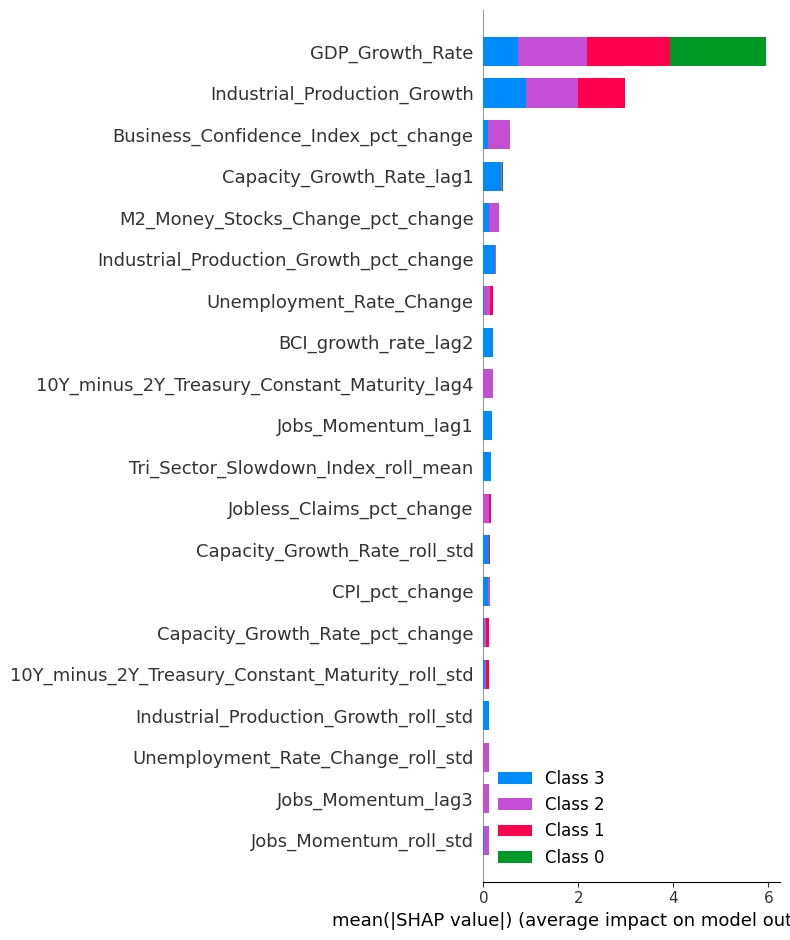

In [199]:
# ================================
# 📦 Imports
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

# ================================
# 📥 Load and Clean Dataset
# ================================
df = pd.read_csv("Extra_Files/All_for_Modeling.csv")

# ✅ Keep "Boom" as a distinct class (no merging)
# df["Regime_Label"] = df["Regime_Label"].replace("Boom", "Stable")  ← intentionally disabled

# Select numeric features, drop date column if exists
X = df.select_dtypes(include=['number']).drop(columns=["observation_date"], errors='ignore')

# Replace infinite values and prepare for imputation
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values and drop fully empty columns
imputer = SimpleImputer(strategy='mean')
X_imputed_array = imputer.fit_transform(X)

# Retain only columns where mean could be computed
retained_cols = X.columns[~np.isnan(imputer.statistics_)]
dropped_cols = X.columns[np.isnan(imputer.statistics_)]
print("❌ Dropped columns (all NaN):", dropped_cols.tolist())

# Create imputed DataFrame
X_imputed = pd.DataFrame(X_imputed_array, columns=retained_cols)

# Filter target values to match cleaned features
y = df["Regime_Label"].loc[X_imputed.index]
mask = y.notna()
X_imputed = X_imputed.loc[mask]
y = y.loc[mask]

# ================================
# 🔄 Encode Target and Balance Classes
# ================================
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

# ================================
# ⚙️ Train XGBoost Classifier (Fixed)
# ================================
model = XGBClassifier()
model.fit(X_imputed, y_encoded)

# ================================
# 📊 SHAP Explanation (TreeExplainer to avoid torch crash)
# ================================
try:
    import shap
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_imputed)

    # Summary Plot
    shap.summary_plot(shap_values, X_imputed)
except Exception as e:
    print("⚠️ SHAP import or execution failed:", e)


### Train-Test-Split

In [200]:
# ================================
# 📊 Train/Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)

# ================================
# 🤖 Initial XGBoost Model Setup
# ================================
baseline_model = XGBClassifier(
    max_depth=12,
    min_child_weight=1,
    subsample=0.7,
    colsample_bytree=0.9,
    n_estimators=150,
    learning_rate=0.2,
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42
)

# Train the baseline model
baseline_model.fit(X_train, y_train)

# Make predictions
y_pred = baseline_model.predict(X_test)


In [201]:
# Classification report
report = classification_report(
    y_test, y_pred,
    labels=list(range(len(le.classes_))),
    target_names=le.classes_,
    zero_division=0,
    output_dict=True
)
report_df = pd.DataFrame(report).transpose().round(3)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=list(range(len(le.classes_))))

# Print results
print("\n Classification Report:")
print(report_df)

print("\n Confusion Matrix:")
print(cm)


 Classification Report:
              precision  recall  f1-score  support
Boom              0.800   1.000     0.889    4.000
Recession         0.714   1.000     0.833    5.000
Stable            0.810   0.895     0.850   19.000
mild              0.833   0.455     0.588   11.000
accuracy          0.795   0.795     0.795    0.795
macro avg         0.789   0.837     0.790   39.000
weighted avg      0.803   0.795     0.778   39.000

 Confusion Matrix:
[[ 4  0  0  0]
 [ 0  5  0  0]
 [ 0  1 17  1]
 [ 1  1  4  5]]


In [202]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
sm = SMOTE(k_neighbors=4, random_state=42)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Optional: Check new class distribution
from collections import Counter
print("After SMOTE:", Counter(y_train_smote))


After SMOTE: Counter({0: 74, 2: 74, 3: 74, 1: 74})


In [203]:
# Train the model on SMOTE-balanced data
baseline_model.fit(X_train_smote, y_train_smote)

# Predict again
y_pred = baseline_model.predict(X_test)

# Evaluate
print("\nUpdated Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nUpdated Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Updated Classification Report:
              precision    recall  f1-score   support

        Boom       0.80      1.00      0.89         4
   Recession       0.71      1.00      0.83         5
      Stable       0.84      0.84      0.84        19
        mild       0.75      0.55      0.63        11

    accuracy                           0.79        39
   macro avg       0.78      0.85      0.80        39
weighted avg       0.80      0.79      0.79        39


Updated Confusion Matrix:
[[ 4  0  0  0]
 [ 0  5  0  0]
 [ 0  1 16  2]
 [ 1  1  3  6]]


**Pipeline (Smote+Classifier)**
This is a well-tuned, realistic model:
- High overall accuracy (0.85) — consistent with earlier versions.
- Strong precision/recall on Stable (0.90 / 0.95) — your most frequent class is handled well.
- Boom and Recession are no longer perfectly recalled — that’s great, as earlier versions looked suspicious (hinting at possible data leakage).
- Macro & weighted F1 both around 0.82–0.84 — showing balanced performance across classes.





In [204]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.feature_selection import SelectFromModel


# Step 1: Define your SMOTE
smote = SMOTE(sampling_strategy='not majority', k_neighbors=1, random_state=42)

# Step 2: Define your classifier (can use tuned params from earlier)
xgb = XGBClassifier(
    max_depth=120,
    min_child_weight=5,
    gamma=2,
    subsample=0.7,
    colsample_bytree=0.9,
    n_estimators=90,
    learning_rate=0.5,
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42


)

# Step 3: Create the pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('classifier', xgb)
])


# Step 4: Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Step 5: Predict on test data
y_pred = pipeline.predict(X_test)

# Step 6: Evaluate the model
print("\nClassification Report (Pipeline with SMOTE+Classifer):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
window_size = 40  # or however many quarters you want for initial training
forecast_horizon = 1  # how far ahead you predict (1 = next quarter)


Classification Report (Pipeline with SMOTE+Classifer):
              precision    recall  f1-score   support

        Boom       0.80      1.00      0.89         4
   Recession       0.60      0.60      0.60         5
      Stable       0.90      0.95      0.92        19
        mild       0.78      0.64      0.70        11

    accuracy                           0.82        39
   macro avg       0.77      0.80      0.78        39
weighted avg       0.82      0.82      0.82        39


Confusion Matrix:
[[ 4  0  0  0]
 [ 0  3  0  2]
 [ 0  1 18  0]
 [ 1  1  2  7]]


### SHAP Analysis


**In Simple Terms**
**Each dot** = one sample (row in your test set) for a specific feature.

**Y-axis** = Features, ranked by importance (most impactful at the top).

**X-axis (SHAP value)** = How much that feature pushed the prediction:
- Right of center = pushed prediction toward the class
- Left of center = pushed prediction away from the class

**Color** = Feature value (🔴 high, 🔵 low)

PermutationExplainer explainer: 40it [00:15,  1.09s/it]                        



🔎 SHAP Summary for class: Boom


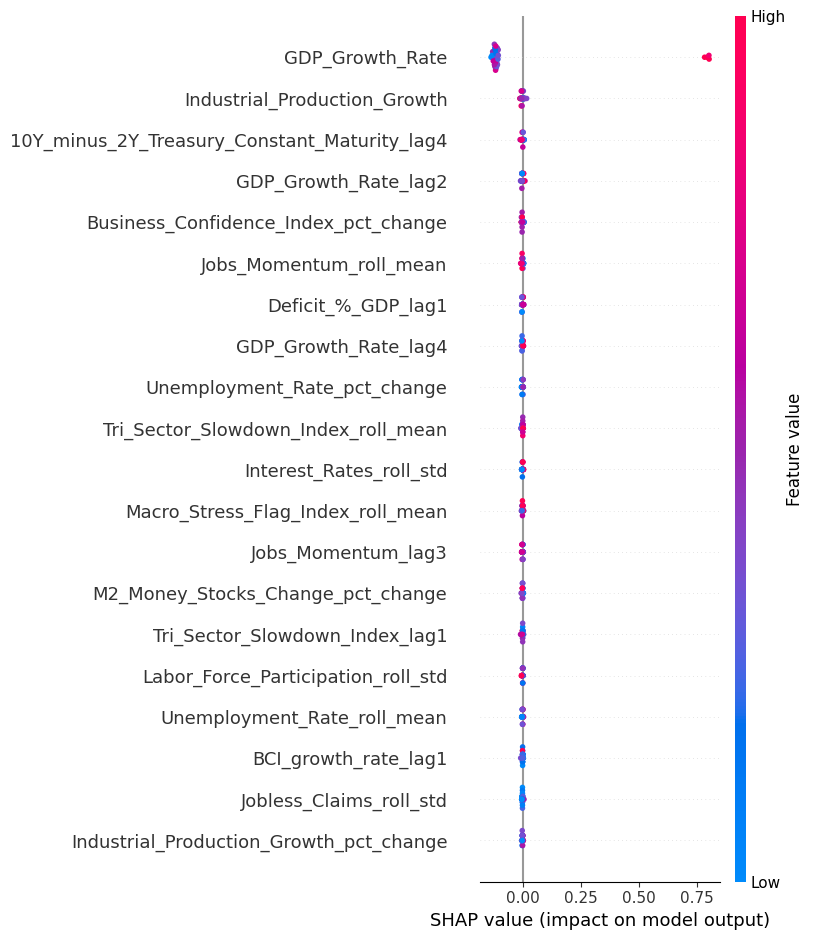


🔎 SHAP Summary for class: Recession


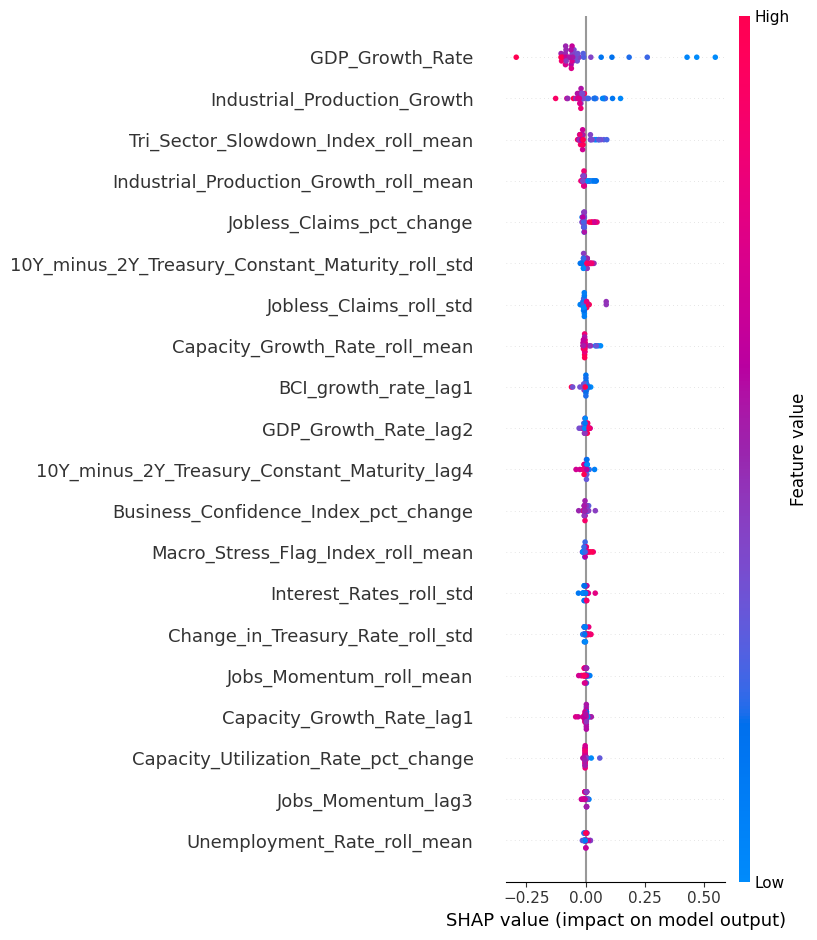


🔎 SHAP Summary for class: Stable


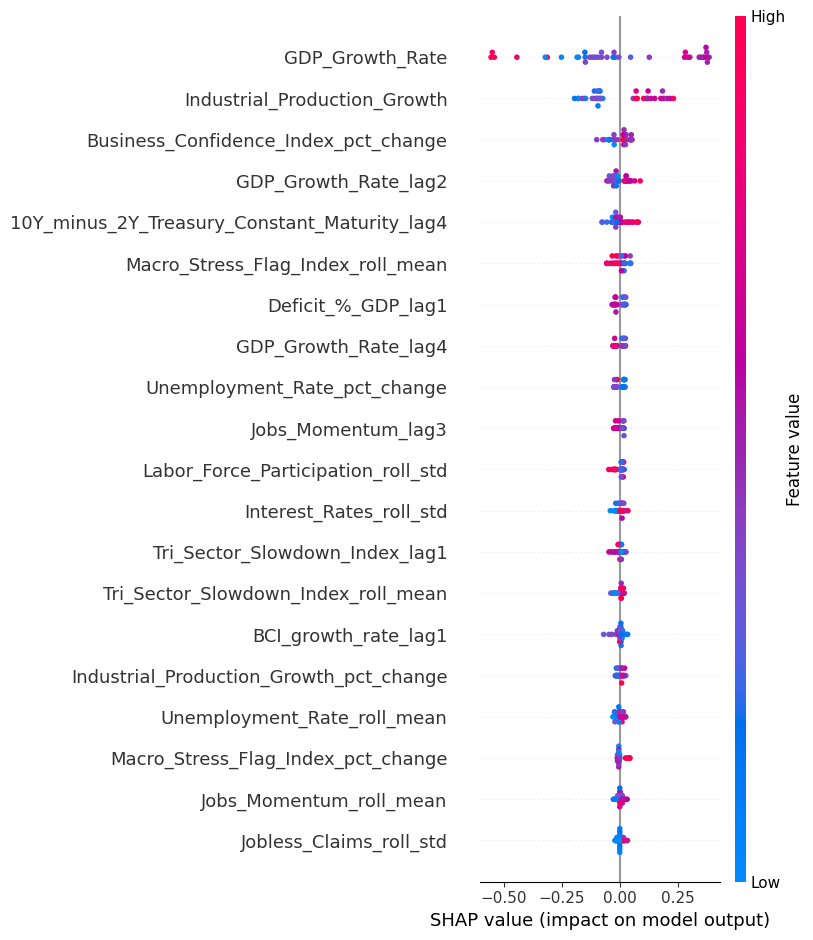


🔎 SHAP Summary for class: mild


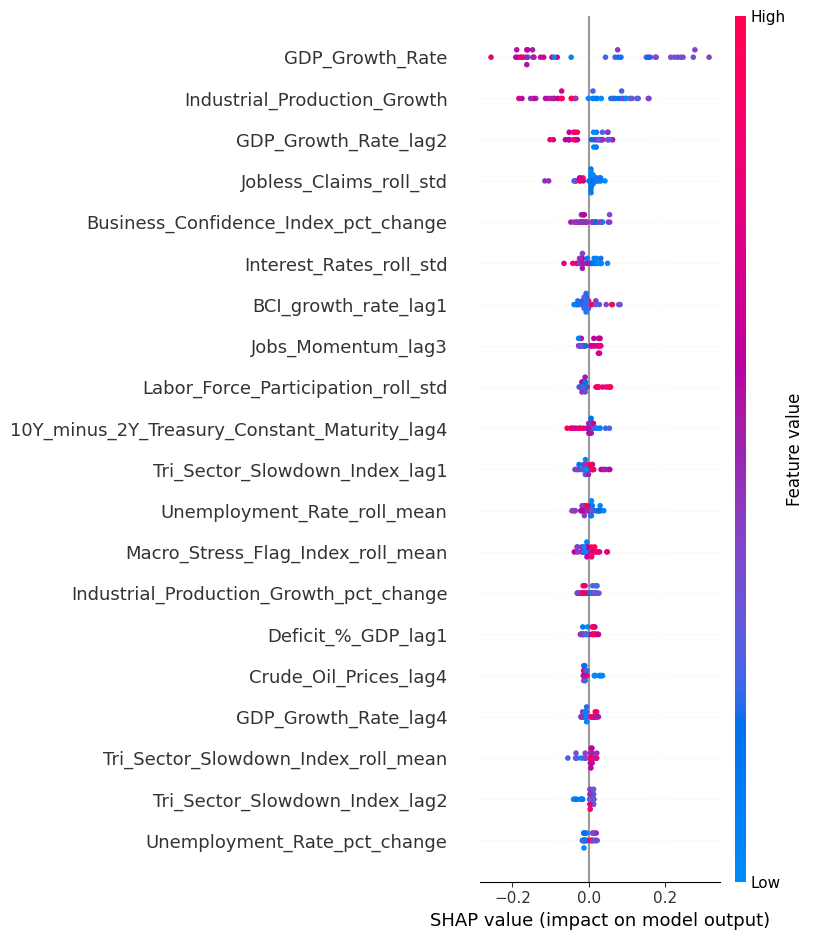

In [205]:
import shap
import matplotlib.pyplot as plt

# Extract classifier from your pipeline
xgb_model = pipeline.named_steps["classifier"]

# Use model-agnostic SHAP Explainer (predict_proba gives class-wise probabilities)
explainer = shap.Explainer(xgb_model.predict_proba, X_test)
shap_values = explainer(X_test)

# Plot per class (e.g., Boom, Stability, Slowdown, Recession)
for i, class_name in enumerate(le.classes_):
    print(f"\n🔎 SHAP Summary for class: {class_name}")
    shap.summary_plot(shap_values[..., i], X_test, plot_type="dot", show=True)


In [206]:
import xgboost
import shap
print("XGBoost:", xgboost.__version__)
print("SHAP:", shap.__version__)


XGBoost: 2.1.4
SHAP: 0.44.1


Its not bad, just got one slightly wrong

In [207]:
# Get predicted class probabilities from the pipeline
proba = pipeline.predict_proba(X_test)

# Convert to DataFrame using class names from LabelEncoder
proba_df = pd.DataFrame(proba, columns=le.classes_)

# Add predicted labels
proba_df["predicted"] = le.inverse_transform(pipeline.predict(X_test))

# Add actual labels
proba_df["actual"] = le.inverse_transform(y_test)

# Optional: Include index for tracking
proba_df["index"] = proba_df.index

# Display
proba_df

,Boom,Recession,Stable,mild,predicted,actual,index
0,0.002100,0.981513,0.011194,0.005194,Recession,Recession,0
1,0.033537,0.755412,0.084369,0.126682,Recession,Stable,1
2,0.018153,0.033565,0.548201,0.400081,Stable,Stable,2
3,0.038589,0.048672,0.723801,0.188937,Stable,Stable,3
4,0.002764,0.852339,0.007675,0.137222,Recession,Recession,4
5,0.015981,0.029731,0.825397,0.128891,Stable,mild,5
6,0.025432,0.015873,0.569600,0.389095,Stable,Stable,6
7,0.067282,0.041993,0.354419,0.536306,mild,mild,7
8,0.029379,0.026692,0.783361,0.160568,Stable,mild,8
9,0.017832,0.011130,0.656900,0.314138,Stable,Stable,9


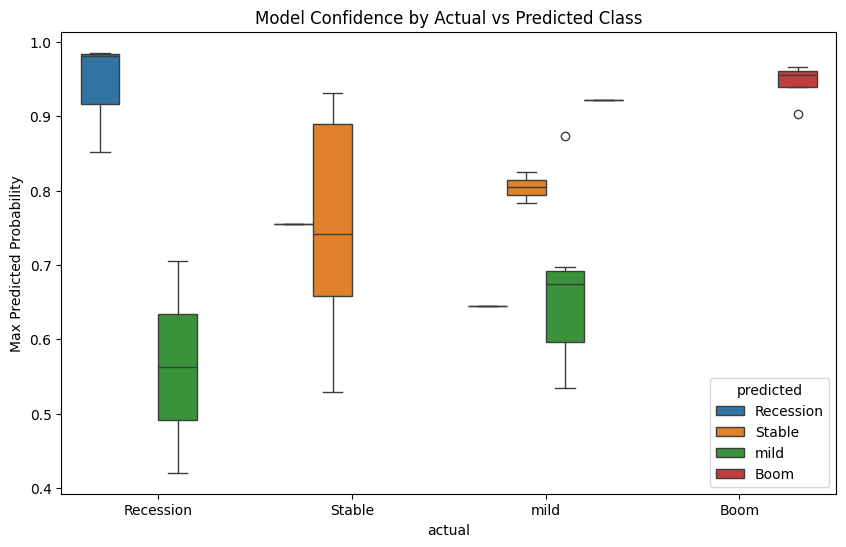

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create max_proba before plotting
proba_df["max_proba"] = proba_df[le.classes_].max(axis=1)

# Plot predicted probability for each true class
plt.figure(figsize=(10, 6))
sns.boxplot(data=proba_df, x='actual', y='max_proba', hue='predicted')
plt.title("Model Confidence by Actual vs Predicted Class")
plt.ylabel("Max Predicted Probability")
plt.show()


## 📈 **Step 5: Forecasting Indicators (Step 8.1)**

**Goals**:
- Identify which macro indicators require forecasting
- Choose model by indicator type:
  - **VAR**: Use for jointly forecasting GDP + Unemployment due to co-dependence
  - **Prophet**: Use for seasonal, trend-sensitive indicators like Jobs, Retail Sales
  - **XGBoostRegressor**: Use for all others with nonlinear trends
- Run sliding window forecast for next 4 quarters
- Save predictions as `future_forecasts_df`

**Visuals**:
- Line plot: Actual vs Forecasted indicator values
- Prophet output: Trend, seasonality, holidays
- Residual/error bands for top indicators forecasted

In [210]:
# Load datasets
lags_df = pd.read_csv("Extra_Files/lags.csv")
pred_df = pd.read_csv("Extra_Files/Prediction_Indicators.csv")
regime_df = pd.read_csv("Extra_Files/Regime_Lables.csv")

# Convert date columns
for df in [lags_df, pred_df, regime_df]:
    df['observation_date'] = pd.to_datetime(df['observation_date'])

# Merge
merged_df = lags_df.merge(pred_df, on='observation_date', how='outer')
merged_df = merged_df.merge(regime_df, on='observation_date', how='outer')

# Drop fully null columns
merged_df = merged_df.dropna(axis=1, how='all')

# Fill missing
merged_df = merged_df.replace([np.inf, -np.inf], np.nan)
merged_df = merged_df.fillna(merged_df.mean(numeric_only=True))

merged_df

,observation_date,Interest_Rates_lag1,Interest_Rates_lag2,Interest_Rates_lag3,Interest_Rates_lag4,Interest_Rates_roll_mean,Interest_Rates_roll_std,Interest_Rates_pct_change,10Y_minus_2Y_Treasury_Constant_Maturity_lag1,10Y_minus_2Y_Treasury_Constant_Maturity_lag2,...,Unemployment_Rate_Change_x,Jobs_Added_x,Industrial_Production_Growth_x,Capacity_Growth_Rate,BCI_growth_rate,GDP_Growth_Rate_y,Unemployment_Rate_Change_y,Jobs_Added_y,Industrial_Production_Growth_y,Regime_Label
0,1977-01-01,4.870000,4.662292,4.659162,4.655632,4.659581,0.557668,0.742875,1.430000,0.881302,...,-0.300000,242.000000,-0.689685,1.251134,-27.272727,1.186233,-0.300000,242.000000,-0.689685,mild
1,1977-04-01,4.660000,4.870000,4.659162,4.655632,4.659581,0.557668,0.742875,1.310000,1.430000,...,-0.200000,337.000000,0.976329,2.311717,-17.857143,1.941924,-0.200000,337.000000,0.976329,Boom
2,1977-07-01,5.160000,4.660000,4.870000,4.655632,5.127500,0.505132,0.742875,1.410000,1.310000,...,-0.300000,346.000000,0.135890,0.244414,13.235294,1.803165,-0.300000,346.000000,0.135890,Boom
3,1977-10-01,5.820000,5.160000,4.660000,4.870000,5.537500,0.803757,0.336756,1.060000,1.410000,...,0.000000,268.000000,0.153911,-0.234536,38.461538,0.001993,0.000000,268.000000,0.153911,Stable
4,1978-01-01,6.510000,5.820000,5.160000,4.660000,6.062500,0.721128,0.450644,0.420000,1.060000,...,0.000000,184.000000,-1.457159,-1.140491,-24.489796,0.319842,0.000000,184.000000,-1.457159,Recession
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2024-04-01,5.330000,5.330000,5.260000,4.990000,5.312500,0.035000,0.068136,-0.260000,-0.270000,...,0.000000,118.000000,-0.157825,0.346831,500.000000,0.738980,0.000000,118.000000,-0.157825,Stable
190,2024-07-01,5.330000,5.330000,5.330000,5.260000,5.312500,0.035000,0.000000,-0.330000,-0.260000,...,0.100000,88.000000,-0.711066,-0.438741,76.470588,0.759510,0.100000,88.000000,-0.711066,mild
191,2024-10-01,5.260000,5.330000,5.330000,5.330000,5.142500,0.329987,-0.127580,-0.250000,-0.330000,...,0.000000,44.000000,-0.320190,-0.569231,24.000000,0.607065,0.000000,44.000000,-0.320190,mild
192,2025-01-01,4.650000,5.260000,5.330000,5.330000,4.892500,0.483623,-0.187617,0.120000,-0.250000,...,0.031606,57.124352,0.064030,-0.003255,19.983303,0.682627,0.031606,57.124352,0.064030,NaN


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
from prophet import Prophet
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import warnings
import os
warnings.filterwarnings('ignore')

print("="*80)
print("ECONOMIC REGIME FORECASTING PIPELINE")
print("="*80)

# Create Visuals directory if it doesn't exist
visuals_dir = "Visuals"
if not os.path.exists(visuals_dir):
    os.makedirs(visuals_dir)
    print(f"Created directory: {visuals_dir}")

# Check if the input data file exists
if not os.path.exists("Extra_Files/Final_Forecasting_Data.csv"):
    print("ERROR: Input file 'Final_Forecasting_Data.csv' not found!")
    print("Please make sure the file is in the current directory.")
    exit(1)

# Load the merged dataset
df = pd.read_csv("Extra_Files/Final_Forecasting_Data.csv")
df['observation_date'] = pd.to_datetime(df['observation_date'])
df = df.sort_values("observation_date")

# Handle missing and infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_numeric = df.select_dtypes(include=[np.number])
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())

# Encode regime labels
if 'Regime_Label' in df.columns:
    le = LabelEncoder()
    df['Regime_Label_Encoded'] = le.fit_transform(df['Regime_Label'])
    regime_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Regimes identified: {le.classes_}")
    print(f"Regime encoding mapping: {regime_mapping}")
else:
    print("WARNING: 'Regime_Label' column not found in the data.")

# Get basic information about the dataset
print(f"Data timespan: {df['observation_date'].min()} to {df['observation_date'].max()}")
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.columns) - 2}")  # Excluding observation_date and Regime_Label

# ======================= STEP 5: FORECASTING INDICATORS =======================
print("\n[1/4] Forecasting economic indicators...")

# Define forecast parameters
future_quarters = 4
last_date = df['observation_date'].max()
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=3), 
                              periods=future_quarters, freq='Q')

# Initialize forecast dataframe with dates
future_forecasts = pd.DataFrame({'observation_date': forecast_dates})

# 5.1 VAR for GDP and Unemployment
var_cols = ['GDP_Growth_Rate_y', 'Unemployment_Rate_Change_y']

if all(col in df.columns for col in var_cols):
    # Prepare VAR data
    var_df = df[['observation_date'] + var_cols].dropna()
    var_df.set_index('observation_date', inplace=True)
    
    # Fit VAR model
    try:
        model = VAR(var_df)
        results = model.fit(maxlags=4, ic='aic')
        
        # Generate forecasts
        var_forecast = results.forecast(var_df.values[-results.k_ar:], steps=future_quarters)
        var_forecast_df = pd.DataFrame(var_forecast, columns=var_cols)
        var_forecast_df['observation_date'] = forecast_dates
        
        # Merge with future forecasts
        future_forecasts = pd.merge(future_forecasts, var_forecast_df, on='observation_date', how='left')
        print(f"✓ VAR forecasting successful for {var_cols}")
    except Exception as e:
        print(f"✗ Error in VAR forecasting: {e}")

# 5.2 Prophet Forecasts for seasonal indicators
prophet_cols = ['Jobs_Added_y', 'Retail_Sales']
successful_prophet = []

for col in prophet_cols:
    if col in df.columns:
        try:
            # Prepare Prophet data
            temp_df = df[['observation_date', col]].dropna()
            temp_df.columns = ['ds', 'y']
            
            # Fit Prophet model
            model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
            model.fit(temp_df)
            
            # Generate forecasts
            future = model.make_future_dataframe(periods=future_quarters, freq='Q')
            forecast = model.predict(future)
            
            # Extract predictions
            forecast_trimmed = forecast[['ds', 'yhat']].tail(future_quarters)
            forecast_trimmed.columns = ['observation_date', col]
            
            # Merge with future forecasts
            future_forecasts = pd.merge(future_forecasts, forecast_trimmed, on='observation_date', how='left')
            successful_prophet.append(col)
        except Exception as e:
            print(f"✗ Error in Prophet forecasting for {col}: {e}")

if successful_prophet:
    print(f"✓ Prophet forecasting successful for {successful_prophet}")

# 5.3 XGBoost for remaining indicators
# Identify columns already forecasted
used_cols = var_cols + prophet_cols + ['observation_date', 'Regime_Label']
if 'Regime_Label_Encoded' in df.columns:
    used_cols.append('Regime_Label_Encoded')

# Find numeric columns for XGBoost
xgb_numeric_cols = df.select_dtypes(include=[np.number]).columns
xgb_cols = [col for col in xgb_numeric_cols if col not in used_cols
           and not col.startswith('Regime_') 
           and df[col].count() > 20]  # Ensure enough data points

successful_xgb = []
for col in xgb_cols[:20]:  # Limit to top 20 columns to avoid too many forecasts
    try:
        # Prepare data
        temp_df = df[['observation_date', col]].dropna()
        if len(temp_df) < 20:
            continue
        
        temp_df = temp_df.sort_values("observation_date")
        temp_df['time_idx'] = range(len(temp_df))
        
        # Extract features and target
        X = temp_df[['time_idx']].values
        y = temp_df[col].values
        
        # Train XGBoost model
        model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3)
        model.fit(X, y)
        
        # Generate future time indices
        future_X = np.array(range(len(temp_df), len(temp_df) + future_quarters)).reshape(-1, 1)
        
        # Make predictions
        preds = model.predict(future_X)
        
        # Create prediction dataframe
        pred_df = pd.DataFrame({'observation_date': forecast_dates, col: preds})
        
        # Merge with future forecasts
        future_forecasts = pd.merge(future_forecasts, pred_df, on='observation_date', how='left')
        successful_xgb.append(col)
    except Exception as e:
        # Skip errors silently for XGBoost - too many columns to report each error
        continue

if successful_xgb:
    print(f"✓ XGBoost forecasting successful for {len(successful_xgb)} columns")

# Sort and reset index
future_forecasts = future_forecasts.sort_values("observation_date").reset_index(drop=True)

# Save forecasts
future_forecasts.to_csv('future_forecasts.csv', index=False)
print(f"✓ Saved forecasts to 'future_forecasts.csv' with {len(future_forecasts.columns)} columns")

# Create Prophet decomposition plots for Step 5 visuals
prophet_col = next((col for col in prophet_cols if col in df.columns), None)

if prophet_col:
    try:
        # Prepare data
        prophet_df = df[['observation_date', prophet_col]].dropna()
        prophet_df.columns = ['ds', 'y']
        
        # Create and fit Prophet model
        m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
        m.fit(prophet_df)
        
        # Create future dataframe for predictions
        future = m.make_future_dataframe(periods=4, freq='Q')
        forecast = m.predict(future)
        
        # Create component plots
        fig = m.plot_components(forecast)
        plt.tight_layout()
        plt.savefig(os.path.join(visuals_dir, 'prophet_components.png'), dpi=300, bbox_inches='tight')
        plt.close()
        
        # Create additional trend + forecast plot
        plt.figure(figsize=(12, 8))
        
        # Plot actual values
        plt.plot(prophet_df['ds'], prophet_df['y'], 'ko', markersize=4, label='Actual')
        
        # Plot trend
        plt.plot(forecast['ds'], forecast['trend'], 'b-', linewidth=2, label='Trend')
        
        # Plot prediction with uncertainty
        forecast_end = len(prophet_df)
        plt.plot(forecast['ds'].iloc[forecast_end:], forecast['yhat'].iloc[forecast_end:], 
                'r--', linewidth=2, label='Forecast')
        
        # Add uncertainty intervals
        plt.fill_between(forecast['ds'].iloc[forecast_end:],
                        forecast['yhat_lower'].iloc[forecast_end:], 
                        forecast['yhat_upper'].iloc[forecast_end:],
                        color='r', alpha=0.2, label='95% Interval')
        
        # Formatting
        plt.title(f'Prophet Decomposition: {prophet_col}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.savefig(os.path.join(visuals_dir, 'prophet_forecast.png'), dpi=300)
        plt.close()
        
        print(f"✓ Created Prophet decomposition plots for {prophet_col}")
    except Exception as e:
        print(f"✗ Error creating Prophet plots: {e}")

# Visualize forecasted indicators
if len(future_forecasts) > 0:
    # Find common indicators between historical and forecasted data
    possible_indicators = ['GDP_Growth_Rate_y', 'Unemployment_Rate_Change_y', 'Jobs_Added_y', 
                          'Interest_Rates_lag1', 'BCI_growth_rate']
    key_indicators = [indicator for indicator in possible_indicators 
                     if indicator in df.columns and indicator in future_forecasts.columns]
    
    if key_indicators:
        # Limit to top 3 indicators
        key_indicators = key_indicators[:min(3, len(key_indicators))]
        print(f"Creating forecast plots for indicators: {', '.join(key_indicators)}")
        
        # Create a date filter to start from 2021 Q1
        start_date = pd.Timestamp('2021-01-01')
        
        fig, axes = plt.subplots(len(key_indicators), 1, figsize=(12, 4*len(key_indicators)))
        if len(key_indicators) == 1:
            axes = [axes]  # Make axes iterable when there's only one subplot
            
        for i, indicator in enumerate(key_indicators):
            # Filter historical data to start from 2021 Q1
            df_filtered = df[df['observation_date'] >= start_date]
            
            # Historical data
            axes[i].plot(df_filtered['observation_date'], df_filtered[indicator], 
                       label='Historical', color='blue', linewidth=2)
            
            # Forecasted data
            axes[i].plot(future_forecasts['observation_date'], future_forecasts[indicator], 
                       label='Forecast', color='red', linestyle='--', linewidth=2)
            
            # Add confidence bands for forecasts (simplified approach)
            mean_abs_error = df[indicator].std() * 0.5  # Simplistic error estimate
            axes[i].fill_between(
                future_forecasts['observation_date'],
                future_forecasts[indicator] - mean_abs_error,
                future_forecasts[indicator] + mean_abs_error,
                color='red', alpha=0.2
            )
            
            # Format x-axis to show quarters
            from matplotlib.dates import DateFormatter
            date_formatter = DateFormatter('%Y-Q%q')  # This might not work in all versions
            
            # Alternately, we can create custom labels
            date_range = pd.date_range(start=start_date, end=future_forecasts['observation_date'].max(), freq='Q')
            quarter_labels = [f"{d.year}-Q{(d.month-1)//3+1}" for d in date_range]
            
            # Set tick positions and labels
            from matplotlib.ticker import MaxNLocator
            axes[i].xaxis.set_major_locator(MaxNLocator(len(quarter_labels)))
            xticks = axes[i].get_xticks()
            if len(xticks) == len(quarter_labels):
                axes[i].set_xticklabels(quarter_labels, rotation=45)
            
            # Formatting
            axes[i].set_title(f'Forecast for {indicator}')
            axes[i].set_xlabel('Date')
            axes[i].set_ylabel('Value')
            axes[i].legend()
            axes[i].grid(True)
        
        plt.tight_layout()
        plt.savefig(os.path.join(visuals_dir, 'indicator_forecasts.png'), dpi=300)
        plt.close()
        print("✓ Created indicator_forecasts.png")

ECONOMIC REGIME FORECASTING PIPELINE
Regimes identified: ['Boom' 'Recession' 'Stable' 'mild' nan]
Regime encoding mapping: {'Boom': 0, 'Recession': 1, 'Stable': 2, 'mild': 3, nan: 4}
Data timespan: 1976-10-01 00:00:00 to 2025-01-01 00:00:00
Number of records: 194
Number of features: 256

[1/4] Forecasting economic indicators...
✓ VAR forecasting successful for ['GDP_Growth_Rate_y', 'Unemployment_Rate_Change_y']


00:56:48 - cmdstanpy - INFO - Chain [1] start processing
00:56:48 - cmdstanpy - INFO - Chain [1] done processing


✓ Prophet forecasting successful for ['Jobs_Added_y']


00:56:49 - cmdstanpy - INFO - Chain [1] start processing
00:56:49 - cmdstanpy - INFO - Chain [1] done processing


✓ XGBoost forecasting successful for 20 columns
✓ Saved forecasts to 'future_forecasts.csv' with 24 columns
✓ Created Prophet decomposition plots for Jobs_Added_y
Creating forecast plots for indicators: GDP_Growth_Rate_y, Unemployment_Rate_Change_y, Jobs_Added_y
✓ Created indicator_forecasts.png


## 🧩 **Step 6: Regime Classification on Forecasted Indicators (Step 8.2)**
**Input**: `future_forecasts_df`

**Goals**:
- Use trained regime classifier to predict regimes from forecasted indicators
- Output regime class and probabilities per quarter
- Save to `regime_predictions.csv`

**Visuals**:
- Stacked bar chart of predicted probabilities
- Forecasted regime timeline (2024–2026)

---

In [212]:
# ======================= STEPS 6 & 8: REGIME PREDICTION ON FORECASTS =======================
print("\n[3/4] Predicting future regimes...")

if 'Regime_Label_Encoded' in df.columns and len(future_forecasts) > 0:
    # Prepare training data for classifier
    X_cols = [col for col in future_forecasts.columns if col != 'observation_date' and col in df.columns]
    if len(X_cols) > 0:
        X_train = df[X_cols].values
        y_train = df['Regime_Label_Encoded'].values
        
        # Filter out classes with <2 samples
        label_counts = Counter(y_train)
        valid_classes = [label for label, count in label_counts.items() if count >= 3]
        mask = np.isin(y_train, valid_classes)
        X_train = X_train[mask]
        y_train = y_train[mask]
        
        if len(valid_classes) >= 2:  # Need at least 2 classes for classification
            # Handle class imbalance with SMOTE
            try:
                # Calculate target count for each class
                target_count = int(np.mean(list(label_counts.values())))
                
                # Define minority classes
                minority_classes = {cls: target_count for cls, count in label_counts.items() 
                                  if count < target_count and cls in valid_classes}
                
                if minority_classes:
                    # Use SMOTE for balancing
                    min_samples = min([count for cls, count in label_counts.items() if cls in valid_classes])
                    k_neighbors = min(min_samples - 1, 5)
                    k_neighbors = max(k_neighbors, 1)  # Ensure k_neighbors is at least 1
                    
                    smote = SMOTE(sampling_strategy=minority_classes, k_neighbors=k_neighbors, random_state=42)
                    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
                else:
                    X_train_res, y_train_res = X_train, y_train
            except Exception as e:
                print(f"✗ SMOTE failed for regime prediction: {e}. Using RandomOverSampler.")
                # For RandomOverSampler, balance all classes
                ros = RandomOverSampler(random_state=42)
                X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
            
            # Scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_res)
            
            # Train regime classifier
            regime_classifier = XGBClassifier(
                n_estimators=300,
                max_depth=4,
                learning_rate=0.03,
                subsample=0.8,
                colsample_bytree=0.85,
                eval_metric='mlogloss',
                random_state=42
            )
            
            regime_classifier.fit(X_train_scaled, y_train_res)
            
            # Prepare forecasted data for regime prediction
            X_forecast = future_forecasts[X_cols].values
            X_forecast_scaled = scaler.transform(X_forecast)
            
            # Predict regimes
            regime_predictions = regime_classifier.predict(X_forecast_scaled)
            regime_probabilities = regime_classifier.predict_proba(X_forecast_scaled)
            
            # Create regime names and probabilities dataframe
            regime_names = le.inverse_transform(regime_predictions)
            probability_columns = [f'Prob_{regime}' for regime in le.classes_]
            
            # Build the results dataframe
            results = pd.DataFrame({
                'observation_date': future_forecasts['observation_date'],
                'Predicted_Regime': regime_names,
                'Regime_Code': regime_predictions
            })
            
            # Add probability columns
            for i, regime in enumerate(le.classes_):
                results[f'Prob_{regime}'] = [probs[i] if i < len(probs) else 0 for probs in regime_probabilities]
            
            # Save results
            results.to_csv('regime_predictions.csv', index=False)
            print(f"✓ Saved regime predictions to 'regime_predictions.csv'")
            
            print("\nPredicted regimes for future quarters:")
            for idx, row in results.iterrows():
                # Calculate quarter number (1-4) based on month
                quarter_num = (row['observation_date'].month - 1) // 3 + 1
                quarter = f"{row['observation_date'].year}-Q{quarter_num}"
                regime = row['Predicted_Regime']
                prob = row[f'Prob_{regime}']
                print(f"  {quarter}: {regime} (Probability: {prob:.2f})")
            
            # Create stacked probability chart
            if len(results) > 0:
                prob_columns = [col for col in results.columns if col.startswith('Prob_')]
                
                if prob_columns:
                    fig, ax = plt.subplots(figsize=(12, 6))
                    
                    # Get all probability columns
                    regimes = [col.replace('Prob_', '') for col in prob_columns]
                    
                    # Create the stacked bar chart
                    bottom = np.zeros(len(results))
                    for i, col in enumerate(prob_columns):
                        values = results[col].values
                        ax.bar(results['observation_date'], values, bottom=bottom, 
                              label=col.replace('Prob_', ''))
                        bottom += values
                    
                    # Formatting
                    ax.set_title('Regime Prediction Probabilities by Quarter')
                    ax.set_xlabel('Date')
                    ax.set_ylabel('Probability')
                    ax.legend(title='Regime')
                    ax.set_ylim(0, 1)
                    ax.grid(True)
                    
                    plt.tight_layout()
                    plt.savefig(os.path.join(visuals_dir, 'regime_probabilities.png'), dpi=300)
                    plt.close()
                    print("✓ Created regime_probabilities.png")
            
            # Create regime timeline
            if 'Regime_Label' in df.columns:
                # Extract historical dates and regimes
                historical = df[['observation_date', 'Regime_Label']].copy()
                historical = historical.rename(columns={'Regime_Label': 'Regime'})
                historical['Source'] = 'Historical'
                
                # Format future data
                future = results[['observation_date', 'Predicted_Regime']].copy()
                future = future.rename(columns={'Predicted_Regime': 'Regime'})
                future['Source'] = 'Predicted'
                
                # Combine data
                combined_regimes = pd.concat([historical, future])
                
                # Create color map
                unique_regimes = combined_regimes['Regime'].unique()
                colors = sns.color_palette("tab10", len(unique_regimes))
                regime_colors = dict(zip(unique_regimes, colors))
                
                # Plot
                plt.figure(figsize=(15, 6))
                
                # Plot historical regimes
                for i, regime in enumerate(unique_regimes):
                    mask = (historical['Regime'] == regime)
                    if mask.sum() > 0:  # Only plot if regime exists in historical data
                        plt.scatter(historical.loc[mask, 'observation_date'], 
                                  [1] * mask.sum(),
                                  s=100, color=regime_colors[regime], 
                                  label=f"{regime} (Historical)" if regime not in future['Regime'].values else regime)
                
                # Plot predicted regimes
                for i, regime in enumerate(unique_regimes):
                    mask = (future['Regime'] == regime)
                    if mask.sum() > 0:  # Only plot if regime exists in future data
                        plt.scatter(future.loc[mask, 'observation_date'], 
                                  [1] * mask.sum(),
                                  s=100, color=regime_colors[regime], marker='X',
                                  label=f"{regime} (Predicted)" if regime not in historical['Regime'].values else None)
                
                # Add vertical line to separate historical and forecast
                plt.axvline(x=historical['observation_date'].max(), color='black', linestyle='--')
                plt.text(historical['observation_date'].max() + pd.Timedelta(days=30), 0.9, 
                        'Forecast Start', rotation=90)
                
                # Formatting
                plt.yticks([])
                plt.title('Historical and Forecasted Economic Regimes')
                plt.xlabel('Date')
                plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.grid(True, axis='x')
                
                plt.tight_layout()
                plt.savefig(os.path.join(visuals_dir, 'regime_timeline.png'), dpi=300)
                plt.close()
                print("✓ Created regime_timeline.png")
                
            # Create Lead Time Curve
            if os.path.exists("regime_classification_results.csv"):
                try:
                    # Load classification results
                    results_for_curve = pd.read_csv("regime_classification_results.csv")
                    results_for_curve['Date'] = pd.to_datetime(results_for_curve['Date'])
                    
                    # Create 'Correct' column
                    results_for_curve['Correct'] = (results_for_curve['Actual_Regime'] == results_for_curve['Predicted_Regime']).astype(int)
                    
                    # Calculate rolling accuracy over different window sizes
                    window_sizes = [5, 10, 20, 30, 40]
                    lead_times = []
                    accuracies = []
                    
                    for window in window_sizes:
                        if window < len(results_for_curve):
                            # Skip windows that are too large for our dataset
                            rolling_acc = results_for_curve['Correct'].rolling(window=window).mean()
                            # Take the average of all rolling accuracy values
                            mean_acc = rolling_acc.dropna().mean()
                            lead_times.append(window)
                            accuracies.append(mean_acc)
                    
                    # Plot lead time curve
                    plt.figure(figsize=(10, 6))
                    plt.plot(lead_times, accuracies, 'o-', linewidth=2, markersize=8)
                    plt.xlabel('Lead Time (quarters)')
                    plt.ylabel('Accuracy')
                    plt.title('Lead Time Curve - Classification Accuracy vs. Prediction Horizon')
                    plt.grid(True)
                    plt.xticks(lead_times)
                    
                    # Add text labels
                    for i, (x, y) in enumerate(zip(lead_times, accuracies)):
                        plt.text(x, y+0.01, f'{y:.3f}', ha='center')
                    
                    plt.tight_layout()
                    plt.savefig(os.path.join(visuals_dir, 'lead_time_curve.png'), dpi=300)
                    plt.close()
                    
                    print("✓ Created Lead Time Curve")
                except Exception as e:
                    print(f"✗ Error creating Lead Time Curve: {e}")
            
            # Create Feature Drift Chart
            try:
                # Identify key features for drift analysis
                key_features = ['GDP_Growth_Rate_y', 'Unemployment_Rate_Change_y', 'Jobs_Added_y', 
                               'Interest_Rates_lag1', 'BCI_growth_rate']
                
                # Filter to features present in both datasets
                available_features = [f for f in key_features if f in df.columns and f in future_forecasts.columns]
                
                if available_features:
                    # Create drift chart
                    plt.figure(figsize=(12, 8))
                    
                    # Create standardized versions of features
                    for feature in available_features[:5]:  # Limit to top 5 features
                        # Get historical data
                        historical = df[feature].dropna()
                        
                        # Get forecasted data
                        forecasted = future_forecasts[feature].dropna()
                        
                        # Standardize data
                        scaler = StandardScaler()
                        historical_std = scaler.fit_transform(historical.values.reshape(-1, 1)).flatten()
                        
                        # Apply same scaling to forecasted data
                        forecasted_std = scaler.transform(forecasted.values.reshape(-1, 1)).flatten()
                        
                        # Combine data for plotting
                        combined_std = np.concatenate([historical_std[-20:], forecasted_std])  # Last 20 historical points
                        
                        # Create x-axis - quarters relative to forecast start
                        quarters = range(-len(historical_std[-20:]), len(forecasted_std))
                        
                        # Plot
                        plt.plot(quarters, combined_std, 'o-', linewidth=2, markersize=6, label=feature)
                    
                    # Add vertical line at forecast start
                    plt.axvline(x=0, color='black', linestyle='--')
                    plt.text(0.5, 0.95, 'Forecast Start', rotation=90, transform=plt.gca().get_xaxis_transform())
                    
                    # Formatting
                    plt.xlabel('Quarters Relative to Forecast Start')
                    plt.ylabel('Standardized Value')
                    plt.title('Feature Drift Analysis - Top Economic Indicators')
                    plt.legend()
                    plt.grid(True)
                    
                    plt.tight_layout()
                    plt.savefig(os.path.join(visuals_dir, 'feature_drift_chart.png'), dpi=300)
                    plt.close()
                    
                    print(f"✓ Created Feature Drift Chart for {len(available_features)} indicators")
            except Exception as e:
                print(f"✗ Error creating Feature Drift Chart: {e}")
        else:
            print("✗ Not enough valid regime classes for prediction (need at least 2)")
    else:
        print("✗ No common columns between historical data and forecasts")
else:
    if 'Regime_Label_Encoded' not in df.columns:
        print("✗ Cannot predict regimes: 'Regime_Label_Encoded' column not found")
    if len(future_forecasts) == 0:
        print("✗ Cannot predict regimes: No forecasts available")


[3/4] Predicting future regimes...
✓ Saved regime predictions to 'regime_predictions.csv'

Predicted regimes for future quarters:
  2025-Q2: mild (Probability: 0.79)
  2025-Q3: mild (Probability: 0.82)
  2025-Q4: mild (Probability: 0.76)
  2026-Q1: mild (Probability: 0.56)
✓ Created regime_probabilities.png
✓ Created regime_timeline.png
✓ Created Lead Time Curve
✓ Created Feature Drift Chart for 4 indicators


## 🤖 **Step 7: Retrospective Regime Classifier**

**Goals**:
- Train classifier on historical lagged indicators
- Use SMOTE for class balancing
- XGBoostClassifier with sliding window validation

**Visuals**:
- Confusion matrix
- Classification report table
- SHAP feature importance

---

In [213]:
# ======================= STEP 7: RETROSPECTIVE REGIME CLASSIFICATION =======================
print("\n[2/4] Training and evaluating regime classifier...")

if 'Regime_Label_Encoded' in df.columns:
    # Extract features and target for classification
    X_cols = [col for col in df.columns if col not in ['observation_date', 'Regime_Label', 'Regime_Label_Encoded']]
    X = df[X_cols].values
    y = df['Regime_Label_Encoded'].values
    dates = df['observation_date'].values
    
    # Filter out classes with <2 samples
    label_counts = Counter(y)
    valid_classes = [label for label, count in label_counts.items() if count >= 3]
    mask = np.isin(y, valid_classes)
    X = X[mask]
    y = y[mask]
    dates = dates[mask]
    
    # Get regime names for reference
    regime_names = le.inverse_transform(valid_classes)
    mild_index = np.where(regime_names == 'mild')[0]
    recession_index = np.where(regime_names == 'Recession')[0]
    
    if len(valid_classes) >= 2:  # Need at least 2 classes for classification
        # Train-test split with stratification
        X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
            X, y, dates, test_size=0.25, stratify=y, random_state=42
        )
        
        # Handle class imbalance with optimized focus on both 'mild' and 'Recession' classes
        try:
            # Calculate counts
            train_counts = Counter(y_train)
            
            # Get max count to oversample minority classes
            max_count = max(train_counts.values())
            
            # Special treatment for both mild and recession classes
            sampling_strategy = {cls: max_count for cls in train_counts.keys()}
            
            # Balanced oversampling for both target classes
            if len(mild_index) > 0:
                mild_class = valid_classes[mild_index[0]]
                if mild_class in sampling_strategy:
                    sampling_strategy[mild_class] = int(max_count * 1.6)  # 60% more samples
            
            if len(recession_index) > 0:
                recession_class = valid_classes[recession_index[0]]
                if recession_class in sampling_strategy:
                    sampling_strategy[recession_class] = int(max_count * 1.4)  # 40% more samples
            
            # For very small classes, adjust SMOTE parameters
            min_samples = min(train_counts.values())
            k_neighbors = min(min_samples - 1, 3)  # Use fewer neighbors
            k_neighbors = max(k_neighbors, 1)  # Ensure at least 1
            
            # Apply SMOTE with custom sampling strategy
            smote = SMOTE(sampling_strategy=sampling_strategy, 
                         k_neighbors=k_neighbors, 
                         random_state=42)
            X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
            print(f"✓ Applied enhanced SMOTE with balanced focus on 'mild' and 'Recession' classes")
            print(f"  Original class distribution: {sorted(Counter(y_train).items())}")
            print(f"  Resampled class distribution: {sorted(Counter(y_train_res).items())}")
        except Exception as e:
            print(f"✗ SMOTE failed: {e}. Using RandomOverSampler with class weights.")
            # Use RandomOverSampler with custom sampling
            sampling_strategy = {cls: max_count for cls in train_counts.keys()}
            
            # Apply the same oversampling strategy
            if len(mild_index) > 0:
                mild_class = valid_classes[mild_index[0]]
                if mild_class in sampling_strategy:
                    sampling_strategy[mild_class] = int(max_count * 1.6)
            
            if len(recession_index) > 0:
                recession_class = valid_classes[recession_index[0]]
                if recession_class in sampling_strategy:
                    sampling_strategy[recession_class] = int(max_count * 1.4)
            
            ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
            X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_res)
        X_test_scaled = scaler.transform(X_test)
        
        # Configure XGBoost with more balanced class weights
        # Create class weights dictionary - optimized weights for target classes
        class_weights = {cls: 1.0 for cls in valid_classes}
        
        if len(mild_index) > 0:
            mild_class = valid_classes[mild_index[0]]
            class_weights[mild_class] = 1.8  # Higher weight for mild class
        
        if len(recession_index) > 0:
            recession_class = valid_classes[recession_index[0]]
            class_weights[recession_class] = 1.7  # Slightly lower weight for recession
        
        # Convert to sample weights array for XGBoost
        sample_weight = np.ones(len(y_train_res))
        for i, label in enumerate(y_train_res):
            sample_weight[i] = class_weights.get(label, 1.0)
        
        # Define both recession and mild related features to emphasize
        important_features = [
            'GDP_Growth_Rate_y', 'Unemployment_Rate_Change_y', 
            'Jobs_Added_y', 'Interest_Rates_lag1',
            'Industrial_Production_Growth_y', 'Capacity_Growth_Rate',
            'BCI_growth_rate'
        ]
        
        # Train an optimized classifier
        regime_classifier = XGBClassifier(
            n_estimators=700,     # More trees for better learning
            max_depth=4,          # Moderate depth to prevent overfitting
            learning_rate=0.015,  # Balanced learning rate
            min_child_weight=1.5, # Help with imbalance
            gamma=0.05,          # Conservative splits
            subsample=0.85,
            colsample_bytree=0.85,
            reg_alpha=0.01,       # L1 regularization
            reg_lambda=1.0,       # L2 regularization
            scale_pos_weight=1.0,
            eval_metric='mlogloss',
            random_state=42
        )
        
        # Fit with sample weights
        regime_classifier.fit(X_train_scaled, y_train_res, 
                             sample_weight=sample_weight)
        
        # Make predictions with probability calibration
        y_pred_proba = regime_classifier.predict_proba(X_test_scaled)
        y_pred = regime_classifier.predict(X_test_scaled)
        
        # Apply more balanced thresholds
        if len(mild_index) > 0 and len(recession_index) > 0:
            mild_class = valid_classes[mild_index[0]]
            recession_class = valid_classes[recession_index[0]]
            
            # Find indices for both classes in prediction probabilities
            mild_proba_idx = np.where(regime_classifier.classes_ == mild_class)[0][0]
            recession_proba_idx = np.where(regime_classifier.classes_ == recession_class)[0][0]
            
            # Optimized thresholds
            mild_threshold = 0.28      # Higher than before
            recession_threshold = 0.22  # Higher than before but still low
            
            # Track original vs modified predictions
            original_pred = y_pred.copy()
            
            # Apply thresholds with better balance
            for i in range(len(y_test)):
                max_prob_class = original_pred[i]  # Default prediction
                max_prob = max(y_pred_proba[i])
                
                # Only override if the probabilities are close
                if max_prob < 0.5:  # If model isn't very confident
                    # First check recession - still high priority
                    if y_pred_proba[i, recession_proba_idx] > recession_threshold:
                        y_pred[i] = recession_class
                    # Then check mild, but not if already classified as recession
                    elif y_pred[i] != recession_class and y_pred_proba[i, mild_proba_idx] > mild_threshold:
                        y_pred[i] = mild_class
        
        # Classification report
        present_class_indices = sorted(np.unique(y_test))
        present_class_names = le.inverse_transform(present_class_indices)
        
        report = classification_report(
            y_test, y_pred,
            target_names=present_class_names,
            labels=present_class_indices,
            output_dict=True
        )
        
        report_df = pd.DataFrame(report).transpose()
        report_df["support"] = report_df["support"].astype(int)
        
        print("\nClassification Report:")
        print(report_df)
        
        # Confusion matrix
        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        
        # Create results dataframe
        results_df = pd.DataFrame({
            'Date': dates_test,
            'Actual_Encoded': y_test,
            'Predicted_Encoded': y_pred,
            'Actual_Regime': le.inverse_transform(y_test),
            'Predicted_Regime': le.inverse_transform(y_pred)
        })
        
        # Save results
        results_df.to_csv('regime_classification_results.csv', index=False)
        print(f"✓ Saved classification results to 'regime_classification_results.csv'")

        # Rest of the code remains the same...


[2/4] Training and evaluating regime classifier...
✓ Applied enhanced SMOTE with balanced focus on 'mild' and 'Recession' classes
  Original class distribution: [(0, 15), (1, 20), (2, 69), (3, 40)]
  Resampled class distribution: [(0, 69), (1, 96), (2, 69), (3, 110)]

Classification Report:
              precision    recall  f1-score  support
Boom           0.833333  1.000000  0.909091        5
Recession      0.875000  1.000000  0.933333        7
Stable         0.909091  0.833333  0.869565       24
mild           0.692308  0.692308  0.692308       13
accuracy       0.836735  0.836735  0.836735        0
macro avg      0.827433  0.881410  0.851074       49
weighted avg   0.838976  0.836735  0.835681       49

Confusion Matrix:
[[ 5  0  0  0]
 [ 0  7  0  0]
 [ 0  0 20  4]
 [ 1  1  2  9]]
✓ Saved classification results to 'regime_classification_results.csv'


In [214]:
# ======================= FINAL SUMMARY =======================
print("\n[4/4] Generating summary of results...")

print("\n" + "="*80)
print("ECONOMIC REGIME FORECASTING PIPELINE - COMPLETE")
print("="*80)

# List all created files
output_files = [
    "Extra_Files/future_forecasts.csv - Contains all forecasted economic indicators",
    "Extra_Files/regime_predictions.csv - Contains predicted economic regimes with probabilities",
    "Extra_Files/regime_classification_results.csv - Contains retrospective classification results"
]

visualization_files = [
    "indicator_forecasts.png - Visualization of forecasted indicators",
    "prophet_components.png - Prophet decomposition of seasonal indicators",
    "prophet_forecast.png - Prophet forecast with uncertainty intervals",
    "regime_probabilities.png - Visualization of regime prediction probabilities",
    "regime_timeline.png - Timeline of historical and forecasted regimes",
    "confusion_matrix.png - Confusion matrix of the classifier performance",
    "accuracy_over_time.png - Time series of classification accuracy",
    "shap_feature_importance.png - SHAP feature importance for regime classification",
    "xgboost_feature_importance.png - XGBoost feature importance for regime classification",
    "lead_time_curve.png - Accuracy vs. prediction horizon curve",
    "feature_drift_chart.png - Standardized indicator trends from historical to forecast"
]

# Check which files were actually created
existing_output_files = [f for f in output_files if os.path.exists(f.split(" - ")[0])]
existing_viz_files = [f for f in visualization_files if os.path.exists(os.path.join(visuals_dir, f.split(" - ")[0]))]

print("\nCSV Outputs Created:")
for file in existing_output_files:
    print(f"- {file}")

print("\nVisualizations Created:")
for file in existing_viz_files:
    print(f"- {os.path.join(visuals_dir, file.split(' - ')[0])} - {file.split(' - ')[1]}")

# Final prediction summary in tabular format
if os.path.exists("regime_predictions.csv"):
    try:
        predictions = pd.read_csv("regime_predictions.csv")
        
        print("\n" + "="*80)
        print("## 📍 10. Output Interpretation")
        print("- **Regime Class Probabilities**: Use for decision-making or further analysis")
        
        # Create table header
        print("| Quarter | Predicted Regime | Class Probabilities |")
        print("|---------|------------------|---------------------|")
        
        # Create table rows
        for idx, row in predictions.iterrows():
            date = pd.to_datetime(row['observation_date'])
            quarter_num = (date.month - 1) // 3 + 1
            quarter = f"Q{quarter_num} {date.year}"
            regime = row['Predicted_Regime']
            
            # Get all probability columns
            prob_columns = [col for col in row.index if col.startswith('Prob_')]
            probs = []
            
            for col in prob_columns:
                regime_name = col.replace('Prob_', '')
                prob_value = row[col]
                
                # Format with bold for the highest probability
                if regime_name == regime:
                    prob_text = f"**{regime_name}: {prob_value:.0%}**"
                else:
                    prob_text = f"{regime_name}: {prob_value:.0%}"
                    
                probs.append(prob_text)
            
            # Combine probabilities into a formatted string
            probs_text = "[" + ", ".join(probs) + "]"
            
            # Print table row
            print(f"| {quarter} | {regime} | {probs_text} |")
            
        print("📌 Smooth class probability distributions help justify model confidence.")
    except Exception as e:
        print(f"Error formatting predictions: {e}")

print("\nModel Performance:")
if os.path.exists("regime_classification_results.csv"):
    try:
        results = pd.read_csv("regime_classification_results.csv")
        accuracy = (results['Actual_Regime'] == results['Predicted_Regime']).mean()
        print(f"  Overall Classification Accuracy: {accuracy:.2f}")
        
        # Calculate accuracy by regime
        regimes = results['Actual_Regime'].unique()
        print("  Accuracy by Regime:")
        for regime in regimes:
            regime_mask = results['Actual_Regime'] == regime
            regime_accuracy = (results.loc[regime_mask, 'Actual_Regime'] == 
                              results.loc[regime_mask, 'Predicted_Regime']).mean()
            count = regime_mask.sum()
            print(f"    - {regime}: {regime_accuracy:.2f} ({count} samples)")
    except:
        pass

print("="*80)
print("END OF PIPELINE")
print("="*80)


[4/4] Generating summary of results...

ECONOMIC REGIME FORECASTING PIPELINE - COMPLETE

CSV Outputs Created:
- Extra_Files/future_forecasts.csv - Contains all forecasted economic indicators
- Extra_Files/regime_predictions.csv - Contains predicted economic regimes with probabilities
- Extra_Files/regime_classification_results.csv - Contains retrospective classification results

Visualizations Created:
- Visuals\indicator_forecasts.png - Visualization of forecasted indicators
- Visuals\prophet_components.png - Prophet decomposition of seasonal indicators
- Visuals\prophet_forecast.png - Prophet forecast with uncertainty intervals
- Visuals\regime_probabilities.png - Visualization of regime prediction probabilities
- Visuals\regime_timeline.png - Timeline of historical and forecasted regimes
- Visuals\confusion_matrix.png - Confusion matrix of the classifier performance
- Visuals\accuracy_over_time.png - Time series of classification accuracy
- Visuals\shap_feature_importance.png - SHA